# Use case: Marine mammals sub-order and sub-species classification

The targets of this project is to classify cetaceans sounds in sub-order and sub-species categories, using features extracted from audio recording. Classification of cetaceans is important for detecting the presence of such animals in high-risk areas, inorder to activate mitigation measures to protect them from possible damages such as collision with ships.

A small survey about cetaneans' sound types is provided hereafter, loosely taken from Chapter 10 of [1]:

4 Delphinidae species classification using whistle and clicks reaches accuracy level of 67% to 75% (2007) [2]

A wavelet based denoising algorithm proposed in [3]

clicks are simultaneously emitted with whistles


## Social Sound Emissions by Odontocetes

Sound emissions by odontocetes (toothed whales and dolphins) can be classified into two broad categories of frequency-varying continuous tonal sounds referred to as (Evans, 1967) whistles and broadband clicks, including burst pulse sounds.

### 1. Whistles

Although many odontocetes produce whistle sounds, there are a few that do not. Among the odontocete species that never or rarely whistle are:
- harbor porpoise (Phocoena phocoena);
- Dall’s porpoise (Phocoenoides dalli);
- Commerson’s dolphin (Cephalorhynchus commersonii);
- Hector’s dolphin (Cephalorhynchus hectori);
- Finless porpoise (Neophocaena phocaenoides);
- Pygmy sperm whale (Kogia sp.);
- Sperm whale (Physter catadon).

However, all odontocetes studied to date do emit clicks and burst pulse sounds. Fundamental armonic in the range of5-35 KHz. Higher harmonics up to 85 KHz. There are many different types of whistles that dolphins emit, both in captivity and in the wild. The traditional method (one still used by many to establish different categories and to determine the repertoire of whistle sounds) consists of visual inspection of spectrograms with particular emphasis on the shape of the whistle contour on the spectrograms. This technique is very subjective and has produced highly variable results
among researchers. The six fundamental categories are:

1. Constant frequency – signals where the frequency changed by about 25% or less over the total duration of the signal (see Fig. 10.9a). In this category, the frequency of the whistle does not really remain constant throughout its duration, but has a minimum amount of frequency change. Taruski (1979) was the first to use this category to describe the whistles of pilot whales;
2. Upsweep – whistles that are frequency modulated with the instantaneous frequency increasing over time and do not have any large inflection points;
3. Downsweep – whistles that are frequency modulated with the instantaneous frequency decreasing over time and do not contain any large inflection points;
4. Concave or Hill – whistles that are frequency modulated with the instantaneous frequency initially increasing with time, followed by an ending portion with the instantaneous frequency decreasing with time;
5. Convex or Valley – whistles that are frequency modulated with the instantaneous frequency initially decreasing with time, followed by an ending portion in which the frequency increases with time;
6. Sinusoidal or Multiple – whistles that are frequency modulated with more than one repetition of a hill or a valley and the contour appearing some- what like a sinusoidal signal with at least two inflection points. 

Categories 2–6 are based on the slope of the whistle and the number of inflection points, where an inflection point is defined as a point at which the slope of the contour reverses in direction, i.e., an upsweep chan- ging to a downsweep (negative inflection) or a downsweep changing to an upsweep (positive inflection). Dolphins are known to develop individually distinctive whistles that are called signature whistles, a term introduced by Caldwell and Caldwell (1965).

### 2. Burst and Pulses

All odontocetes produce burst pulse sounds. For dolphins and small whales, burst pulse sounds are characterized by a high repetition rate (greater than about 300 pulses per second) or low interpulse intervals (less than about 3 ms). Burst pulse sounds can have frequency components that extend beyond 100 kHz (Lammers and Au, 1996).



## Social Sound Emissions by Mysticetes

The vocalizations of baleen whales can be divided into two general categories (Clark, 1990): 
1. songs 
2. calls
    a. simple calls;
    b. complex calls; 
    c. clicks, pulses, knocks, and grunts (Clark, 1990).
    
### 1. Songs
defined as ‘‘sequences of notes occurring in a regular sequence and patterned in time’’ (Clark, 1990). Songs are easily discriminated from calls in most instances.

### 2. Calls

#### a. Simple calls 
low-frequency, frequency-modulated signals with narrow instantaneous bandwidth that sounds like moans if a recording is speeded up or slowed down, depending on the specific animal. Amplitude modulation and the presence of harmonics are usually part of a simple call, with most of the energy below 1 kHz.

#### b. Complex calls 
pulse-like broadband signals with a variable mixture of amplitude-modulated noise and/or a frequency-modulated fundamental. They sound like screams, roars, and growls, with most of
the energy between 500 and 5,000 Hz.

#### c. Clicks, pulses, knocks, and grunts
short-duration (<0.1 s) signals with little or no frequency modulation. According to Clark (1990), clicks and pulses are very short (<2 ms) signals with frequencies between 3 and 31 kHz, while grunts and knocks are longer
(50–100 ms) signals in the 100–1,000 Hz range. Clicks and pulses have not been reported widely and they are the most controversial signals attributed to mysticetes.

## References

[1] Whitlow W.L. and Au Mardi C. Hastings, "Principles of Marine Bioacoustics", Springer, 2008

[2] M. A. Roch, M.S. Soldevilla, J.C. Burtenshaw, E.E. Henderson, and J.A. Hildebrand, “Gaussian Mixture Model Classification of Odontocetes in the Southern California Bight and The Gulf of California,” J. Acoust. Soc. Am., 121, 1737-1748, 2007.

[3] P.J. Seekings, J. Tan, J. Potter, M. Hoffman-Kuhnt, A. Pack, and L. Herman, “Denoising Dolphin Click Series in the Presence of Tonals Using Singular Spectrum Analysis and Higher Order Statistics,” In Proceedings of OCEANS 2006-Asia Pacific, 1-6, 2006.


# 1. Module and base parameters

In [1]:
# General Modules 
import os
import sys
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import h5py

# PCA related modules
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.externals.joblib import parallel_backend

# Plot module
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from IPython.display import display
from IPython.display import Audio
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import IntProgress, Button, HBox, VBox, interact, interactive, fixed, interact_manual
import pandas.plotting as pdplt
from pandas.plotting import scatter_matrix

# KERAS
try:
    import keras
    from keras.models import load_model
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
    from keras.layers import Conv1D, MaxPooling1D, LSTM
    from keras import initializers
    from keras.optimizers import RMSprop
    from keras.constraints import max_norm
    from keras.layers.normalization import BatchNormalization
except: 
    !pip install keras
    import keras
    from keras.models import load_model
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
    from keras.layers import Conv1D, MaxPooling1D, LSTM
    from keras import initializers
    from keras.optimizers import RMSprop
    from keras.constraints import max_norm
    from keras.layers.normalization import BatchNormalization
    
# Audio processing modules
try:
    import soundfile as sf
    import librosa
except:   
    # libsndfile is not in the default conda repo, so we have to add conda-forge
    !conda config --add channels conda-forge
    !conda install -y libsndfile
    !pip install soundfile
    !pip install librosa

    import soundfile as sf
    import librosa

# Html data extraction module
try:
    import bs4
    from bs4 import BeautifulSoup
except:
    !pip install beautifulsoup4
    import bs4
    from bs4 import BeautifulSoup

# Wavelet module
try:
    import pywt
except:
    !pip install pywt
    import pywt    

# URL download modules
try:
    import wget
except:
    !pip install wget
    import wget
    
try:
    import urllib.request as urllib
except:
    !pip install urllib.request
    import urllib.request as urllib

# Multi processes environment
try:
    import multiprocessing as mp

except:
    !pip install multiprocessing
    import multiprocessing as mp
    
%matplotlib inline

# Parameters
database = 'balenine_s100.h5'
nscales  = 100
npca     = 10

/home/panino/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 2. Data Source

## 2.1 The Watkins Dataset

The data used for this project is downloaded from the Watkins Marine Mammals Sounds Database (https://whoicf2.whoi.edu/science/B/whalesounds/index.cfm). This database consists of recordings of various marine mammal species collected over a span of seven decades in a wide range of geographic areas by Watkins and many others. A total of ~8700 sound data is available 

Two types of data are downloaded: wav files and cfm metadata. The latter type of data contains information about the recording (see https://cis.whoi.edu/science/B/whalesounds/WHOI-92-31.pdf for more information about the information types)

Audio data contains sample with very low Signal-to-Noise Ratio (SNR)

In [2]:
# Target url
base_url="https://whoicf2.whoi.edu/science/B/whalesounds/WhaleSounds/"
base_meta_url="https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN="

# Dig data in the website whitin these ranges
from_year    = 80
to_year      = 99
from_species = 1
to_species   = 300
num_wav      = 1296

def baseN(num, b, numerals="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    return ((num == 0) and "0" ) or ( baseN(num // b, b).lstrip("0") + numerals[num % b])

In [25]:
# Download wav files
for i, j  in ( (i,j) for i in range(from_year, to_year) for j in range(from_species, to_species) ):
    for k in range(1, num_wav):
        wav_file = str(i) + str(j).zfill(3) + baseN(k, 36).zfill(3)
        url=base_url + wav_file + ".wav"
 
        try:
            urllib.urlopen(url)
                 
            print("Now downloading:" + url)
            wget.download(url)
            
        except urllib.HTTPError as e:
            print("File {:s} not found with error code {:d}".format(wav_file, e.code))
            break

Now downloading:https://whoicf2.whoi.edu/science/B/whalesounds/WhaleSounds/80001001.wav


NameError: name 'wget' is not defined

In [18]:
# Download metadata file
base_meta_url="https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN="

for file in os.listdir('./'):
    if(file.endswith(".wav")):
        name, ext = file.split('.')
        outp = name + '.cfm'
        url=base_meta_url + name  
 
        try:
            urllib.urlopen(url)
            print("Now downloading metadata:" + url)
            wget.download(url)
            os.rename('metaData.cfm', outp)
    
        except urllib.HTTPError as e:
            print("File {:d} not found with error code {:d}".format(i, e.code))


Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001001
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001002
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001003
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001004
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001005
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001006
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001007
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001008
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=80001009
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/metaData.cfm?RN=8000100A
Now downloading metadata:https://cis.whoi.edu/science/B/whalesounds/me

In [6]:
# Store data
!mkdir dataset_watkins
!mv *.wav *.cfm ./dataset_watkins/

# 3. Data Exloration

Data exploration is performed on a subset of random chosen samples from the set of files.

## 3.1 Parameters and functions

The script converts each data sample to a reference sample rate of 44100 KHz mono. After processing data is collected in lists

In [2]:
# Constants / parameters
ninfo = 31
nsample = 40
minsize = 20000
maxsize = 400000
ref_samplerate = 44100
scales = np.arange(1, 101)

In [3]:
def to_mono(data):
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    return data

def resampling(data, samplerate, target_samplerate):
    if (samplerate != target_samplerate):
        data = librosa.resample(data, samplerate, target_samplerate)
        samplerate = target_samplerate
    return data, samplerate

def process_audio(name, ref_samplerate, maxsize):
    bar_style  = 'info' # some fancyness
    samplerate = 0
    
    # Read wav and metadata
    try:
        # Read wav data
        data, samplerate = sf.read('./dataset_watkins/' + name + '.wav', always_2d=True)
        
        # Convert data to mono 
        data = to_mono(data)
    
        # Take shorter data segment
        data = data[:maxsize] 
    
        # Resample data to the target frequency
        data, new_samplerate = resampling(data, samplerate, ref_samplerate)

    except:
        bar_style = 'danger'
        data = None
        print("Unable in processing wav file {:s} . Skipping.".format(name)) 

    return bar_style, data, samplerate, new_samplerate if data is not None else None, 

def process_metadata(name):
    bar_style = 'info' # some fancyness

    try:
        soup = BeautifulSoup(open('./dataset_watkins/' + name + '.cfm'), "html.parser")
        link = soup.p.a
        link.decompose()
    
        stack = []
        for tr in soup.find_all('tr')[2:]:
            for td in tr.find_all('td')[1:]:
                stack.append( td.text.strip() )
                
    except:
        bar_style = 'danger'
        print("Unable in processing Meta file {:s} . Skipping.".format(name)) 
        
    return bar_style, np.array(stack) if len(stack) is not 0 else None

def make_play_method(audio, samplerate):
    def _method(self):
        display(Audio(audio, rate=samplerate, autoplay=True))
    return _method

## 4.1 Preliminary Extract, Transform and Load (ETL)

Here data is explored withouth the use of dataframe

In [4]:
# Collectors
audio_data = []
audio_size = []
names = []
original_sampling_rate = []
sampling_rate = []      
        
# Get list of file wav
file_list = [ x.split('.')[0] for x in os.listdir('./dataset_watkins/') if '.wav' in x ]

# Select a random pick from the database
sample_list = random.sample(population=file_list, k=nsample)

# Instantiate a progress bar
f = IntProgress(min=0, max=nsample)
display(f) # display the bar 

# Collect data
for name in sample_list:
    
    # Read wav and metadata   
    f.bar_style, data, samplerate, new_samplerate = process_audio(name, ref_samplerate, maxsize)
    f.bar_style, meta = process_metadata(name)    
 
    # Keep audio if both wav and metadata are available and sound file is above a defined size
    if(data is not None and meta is not None and data.size > minsize):
        original_sampling_rate.append(samplerate)        
        audio_data.append(data)
        audio_size.append(data.size)
        names.append("_".join( meta[10].split(' ')[:2]) ) 
        sampling_rate.append(new_samplerate)
    
    f.value += 1

f.bar_style = 'success'
print('Collected {:d} samples. Discarded {:d} samples'.format(len(audio_data), nsample - len(audio_data)))
nsample = len(audio_data)

IntProgress(value=0, max=40)

Collected 33 samples. Discarded 7 samples


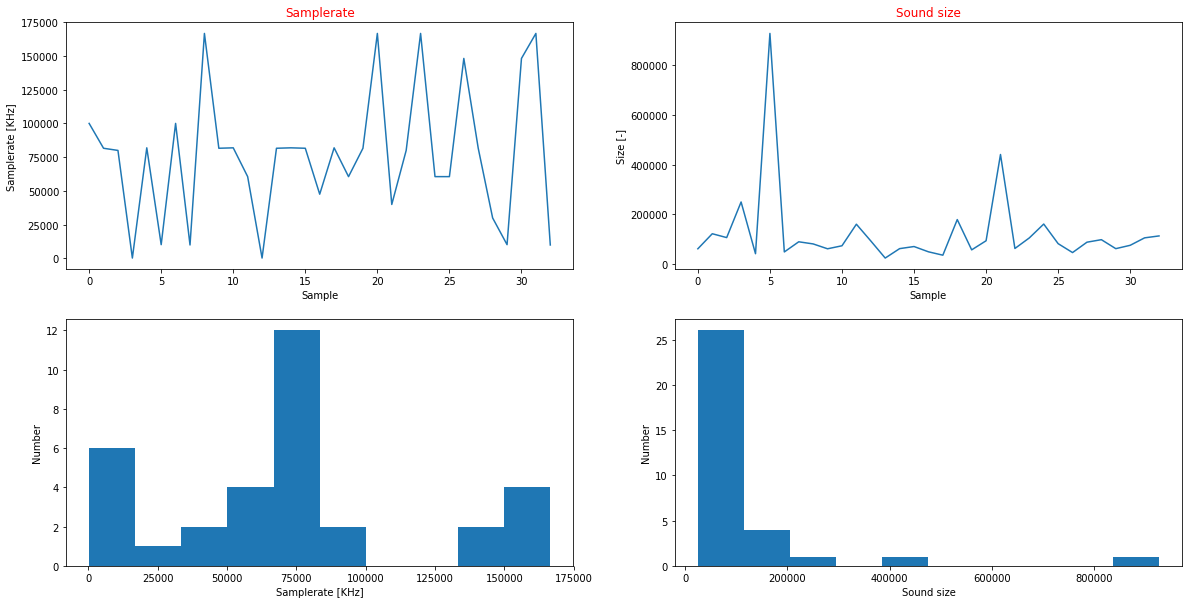

In [5]:
# Plot samplerate and audio size
plt.figure(1, figsize=(20,10))

plt.subplot(221); 
plt.plot(original_sampling_rate)
plt.title('Samplerate', color='r')
plt.xlabel('Sample')
plt.ylabel('Samplerate [KHz]')

plt.subplot(222); 
plt.plot(audio_size)
plt.title('Sound size', color='r')
plt.xlabel('Sample')
plt.ylabel('Size [-]')

plt.subplot(223); 
plt.hist(original_sampling_rate, bins=10)
plt.xlabel('Samplerate [KHz]')
plt.ylabel('Number')

plt.subplot(224); 
plt.hist(audio_size, bins=10)
plt.xlabel('Sound size')
plt.ylabel('Number')

plt.show()

## 4.2 Plot a random pick of data in time and frequency domains

From the sampled sound files a few samples (takes) are extracted for visualization. Number of takes can be from 1 to 6.

In [8]:
# Plot parameters
ntakes = 4
nplots = int((ntakes + 1) / 2) * 100 + 21 if ntakes is not 0 else 121
size = int((ntakes + 1) / 2) * 4 if ntakes is not 0 else 4

# extract nsample data from dataset
#np.random.seed(123491823)
take = [ np.random.randint(len(audio_data)) for i in range(ntakes) ]
take_size = [ audio_data[x].shape[0] for x in take ]

Plot samples in the time domain. Play button are also provided.

Many sounds file contain a relevant component of noise (e.g. white noise, engines, water noise). Quality and size of data is variable. It is also observed a clear difference between humpbacks and dolphin whales sound files 

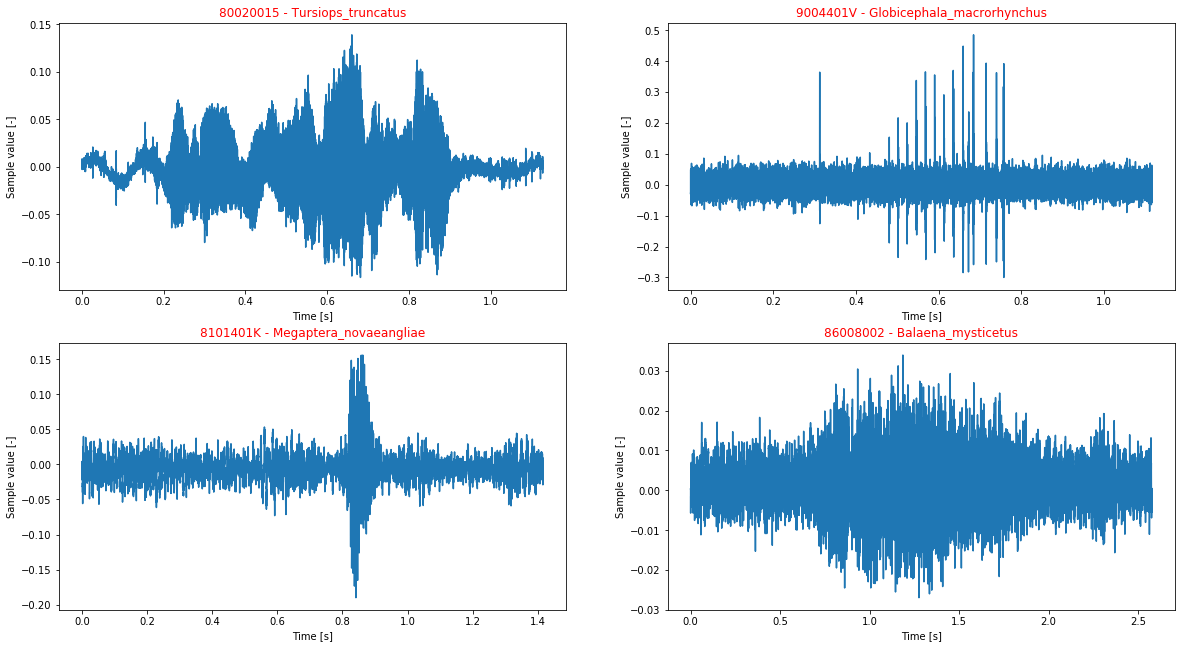

In [9]:
# Plot in time domain
plt.figure(1, figsize=(20,ntakes * 2.7))

button_list = []
for i in range(ntakes):
    
    # current take
    audio = audio_data[take[i]]
    samplerate = sampling_rate[take[i]]
    file=file_list[take[i]] + ' - ' + str(names[take[i]])
    time = np.arange(0, audio.size) / ref_samplerate # seconds
    
    # Plot
    plt.subplot(nplots + i); 
    plt.plot(time, audio)
    plt.xlabel('Time [s]')
    plt.ylabel('Sample value [-]')
    plt.title(file, color='r')

    # play button
    button = widgets.Button(description=file, button_style='info')
    button.on_click(callback=make_play_method(audio, samplerate))
    button_list.append(button)
    
# Show plot
plt.show() 

# Show buttons
HBox(button_list)

 Now correspondent plots in the frequency domain

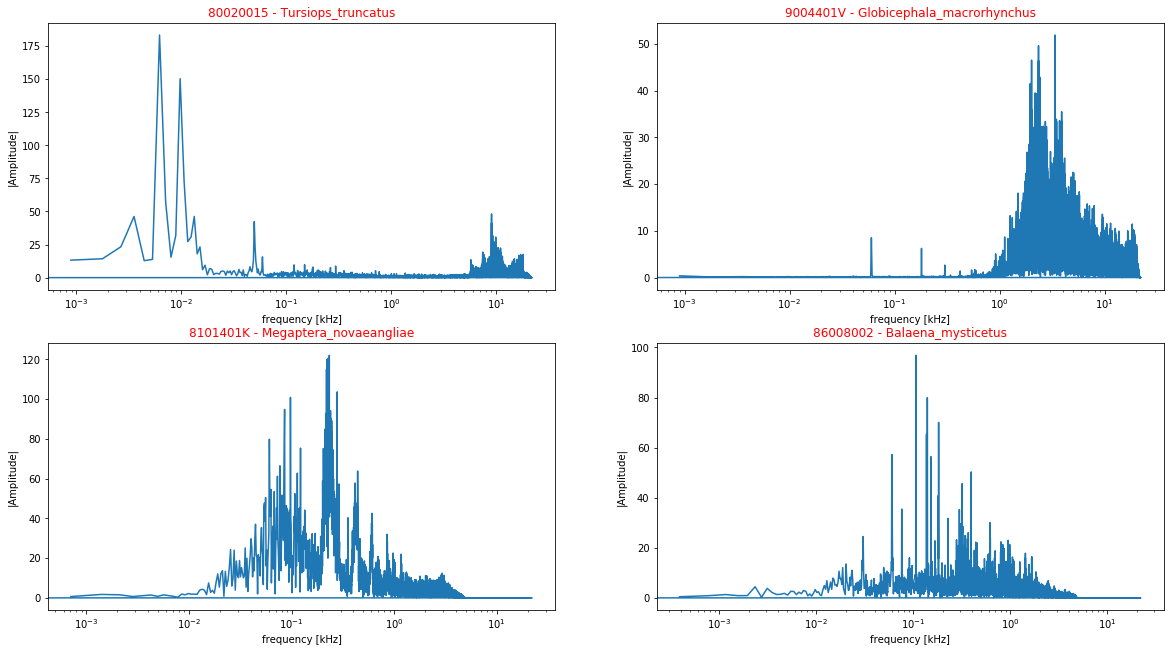

In [10]:
plt.figure(1, figsize=(20,ntakes * 2.7))
for i in range(ntakes): 
    
    # Current take
    audio = audio_data[take[i]]
    file=file_list[take[i]] + ' - ' + str(names[take[i]])

    n = audio.size
    time= np.arange(audio.size) / ref_samplerate # seconds 
    
    # FFT
    freq  = np.fft.fftfreq(n) * ref_samplerate / 1000
    sp    = np.fft.fft(audio)
    A     = np.sqrt(sp.real**2 + sp.imag**2)
    
    # Plot
    plt.subplot(nplots + i); 
    plt.xscale('log')
    plt.title(file, color='r')
    plt.xlabel('frequency [kHz]')
    plt.ylabel('|Amplitude|')    
    plt.plot(freq[1:], A[1:])
    
plt.show()

## 4.3 Explore the frequency space for selected sample

Since signal/noise ratio is quite low for several samples, a strategy for its reduction will be a target of next analyses. The Fourier transform could be used for noise reduction, particularly in the case of Dolphin Whales, because in that case the signal is very localized in the time and frequency ranges. Here, a preliminary analysis is conducted, using a Principal Component Analysis (PCA) for dimensionality reduction in the frequency space. 

In [79]:
# Convert all sample to frequency domain
features_fft = np.zeros([0, minsize - 1])

f = IntProgress(min=0, max=len(audio_data)) # instantiate a progress bar
f.bar_style = 'info'
display(f) # display the bar 

for i in range(nsample):

    audio = audio_data[i][:minsize - 1]
    n     = audio.size
    time  = np.arange(n) / ref_samplerate # seconds 
    
    # FFT
    freq  = np.fft.fftfreq(n) * ref_samplerate / 1000
    sp    = np.fft.fft(audio)
    A     = np.sqrt(sp.real**2 + sp.imag**2)

    features_fft = np.vstack( (features_fft, A) )
    
    f.value += 1

f.bar_style = 'success'
print("Number of feature:\t{:d}".format(features_fft.shape[1]))

IntProgress(value=0, bar_style='info', max=24)

Number of feature:	19999


In [80]:
# Search relevant features using PCA
max_ndim = 100
target_explained_variance = 0.8

print("Ndim\tExpl.Variance")
for i in range(1, max_ndim):
    pca = PCA(n_components=i)
    features_scaled = scale(features_fft)
    X = pca.fit_transform(features_scaled)
    var = pca.explained_variance_ratio_
    cumvar = np.cumsum(var)
    print("{:d}\t{:.2f}".format(i, cumvar[-1]))

    if(cumvar[-1] >= target_explained_variance):
        break

print("\nVariability of the dataset is represented up to {:.1f}% with {:d} dimensions" \
      .format(target_explained_variance*100.,i))

Ndim	Expl.Variance
1	0.53
2	0.62
3	0.70
4	0.75
5	0.81

Variability of the dataset is represented up to 80.0% with 5 dimensions


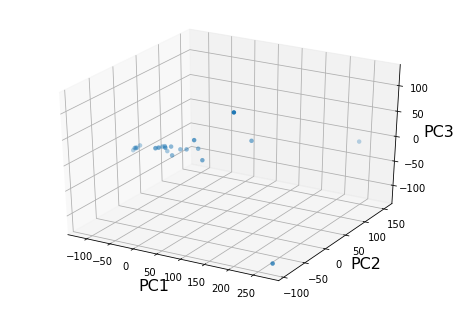

In [81]:
# Plot first 3 components (~%56 expl. variance)
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("PC1", fontsize=16)
ax.set_ylabel("PC2", fontsize=16)
ax.set_zlabel("PC3", fontsize=16)
ax.autoscale(enable=True, axis='Both')
ax.scatter(x, y, z, linewidth=0, antialiased=True)

plt.show()

There is some structure, but more analyses are necessary.

Actually, another aproach for noise reduction could be to split a single wav file to a batch of shorter length, then run the FFT and see at the correlation between features. Lowest correlated features could be interpreted as pointer to the range of noise frequency.

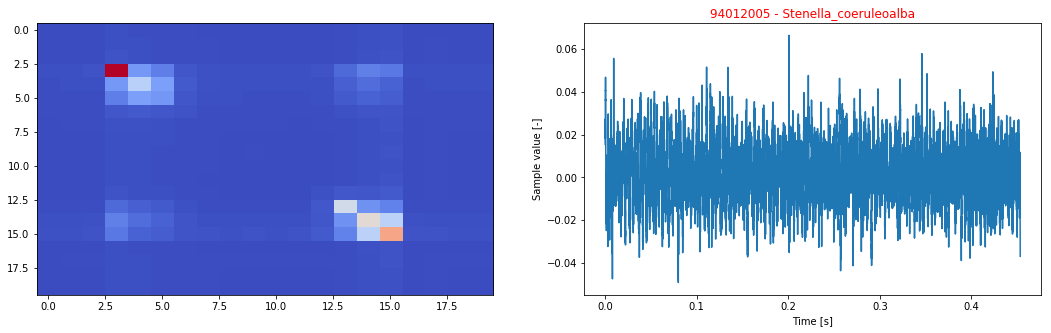

In [82]:
# Correlate batches for 1 audio sample
sample = audio_data[2]
trange = int(sample.size / 20)
bsize  = int(np.round_( trange / 2 , decimals=0))
batch  = np.zeros([0, bsize])

for i in range(0, sample.size, trange):
    sp = np.array(abs(np.fft.rfft(sample[i:(i+trange) - 1])))
    if(sp.size == bsize):
        batch = np.vstack((batch, sp))

A=np.dot(batch, batch.T)
plt.figure(1, figsize=(18, 5))
plt.subplot(121); 

plt.imshow(A, cmap='coolwarm', aspect='auto')  

plt.subplot(122); 
plt.plot(time, audio)
plt.xlabel('Time [s]')
plt.ylabel('Sample value [-]')
plt.title(file, color='r')
plt.show()     

## 4.3 Look at wavelet transform for selected sample

### 4.3.1 Base Wavelet transform

Most relevant features of wavelets coefficient will be used for feeding a convolutional NN. In this section wavelets are shown for selected samples.

Cumvar=	0.97


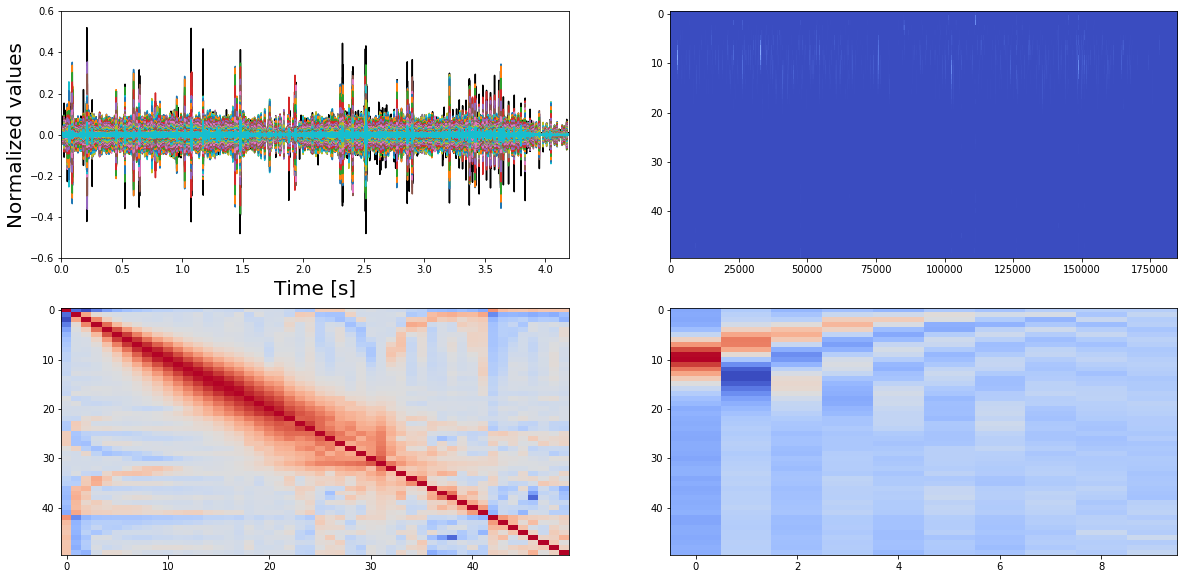

In [334]:
# Check noise, cliks, song effect to wavelet pca
index  = 10
pca    = PCA(n_components=10)
audio  = np.array(audio_data[index] / (max(audio_data[index]) - min(audio_data[index])))
time   = np.arange(0, audio.size) / ref_samplerate # seconds
scales = np.arange(1, 51)
coeff  = pywt.cwt(audio_data[index], scales=scales, wavelet='morl')
A      = np.corrcoef(coeff[0])
feat   = pca.fit_transform(coeff[0])
cumvar = np.cumsum( pca.explained_variance_ratio_ ) 
print("Cumvar=\t{:.2f}".format(cumvar[-1]))

# Plot
plt.figure(1, figsize=(20,10))
plt.title(file_list[index] + ' - ' + names[index], color='r')
ax1 = plt.subplot(2, 2, 1)
ax1.set_xlabel('Time [s]', size=20)
ax1.set_ylabel('Normalized values', size=20)
ax1.set_xlim(0,time[-1])
ax1.set_ylim(-0.6, 0.6)
#ax.set_xticks(16)
#ax.set_yticks(size=16)

# wav file
channel = 50
ax1.plot(time, audio, c='black')  
[ ax1.plot(time, coeff[0][i]) for i in range(channel) ] 

# wavelet
ax2 = plt.subplot(2, 2, 2)
ax2.imshow(coeff[0]**2, cmap='coolwarm', aspect='auto')  

# Correlation between wavelet scales
ax3 = plt.subplot(2, 2, 3)
ax3.imshow(A, cmap='coolwarm', aspect='auto')  

# PCA of correlation
ax4 = plt.subplot(2, 2, 4)
ax4.imshow(feat, cmap='coolwarm', aspect='auto') 
plt.show()

now testing the different wavelets

Testing mother wavelet: gaus1  - Cumvar=	1.00 
Testing mother wavelet: gaus2  - Cumvar=	1.00 
Testing mother wavelet: gaus3  - Cumvar=	1.00 
Testing mother wavelet: gaus4  - Cumvar=	1.00 
Testing mother wavelet: gaus5  - Cumvar=	1.00 
Testing mother wavelet: gaus6  - Cumvar=	1.00 
Testing mother wavelet: gaus7  - Cumvar=	1.00 
Testing mother wavelet: gaus8  - Cumvar=	1.00 
Testing mother wavelet: mexh   - Cumvar=	1.00 
Testing mother wavelet: morl   - Cumvar=	1.00 


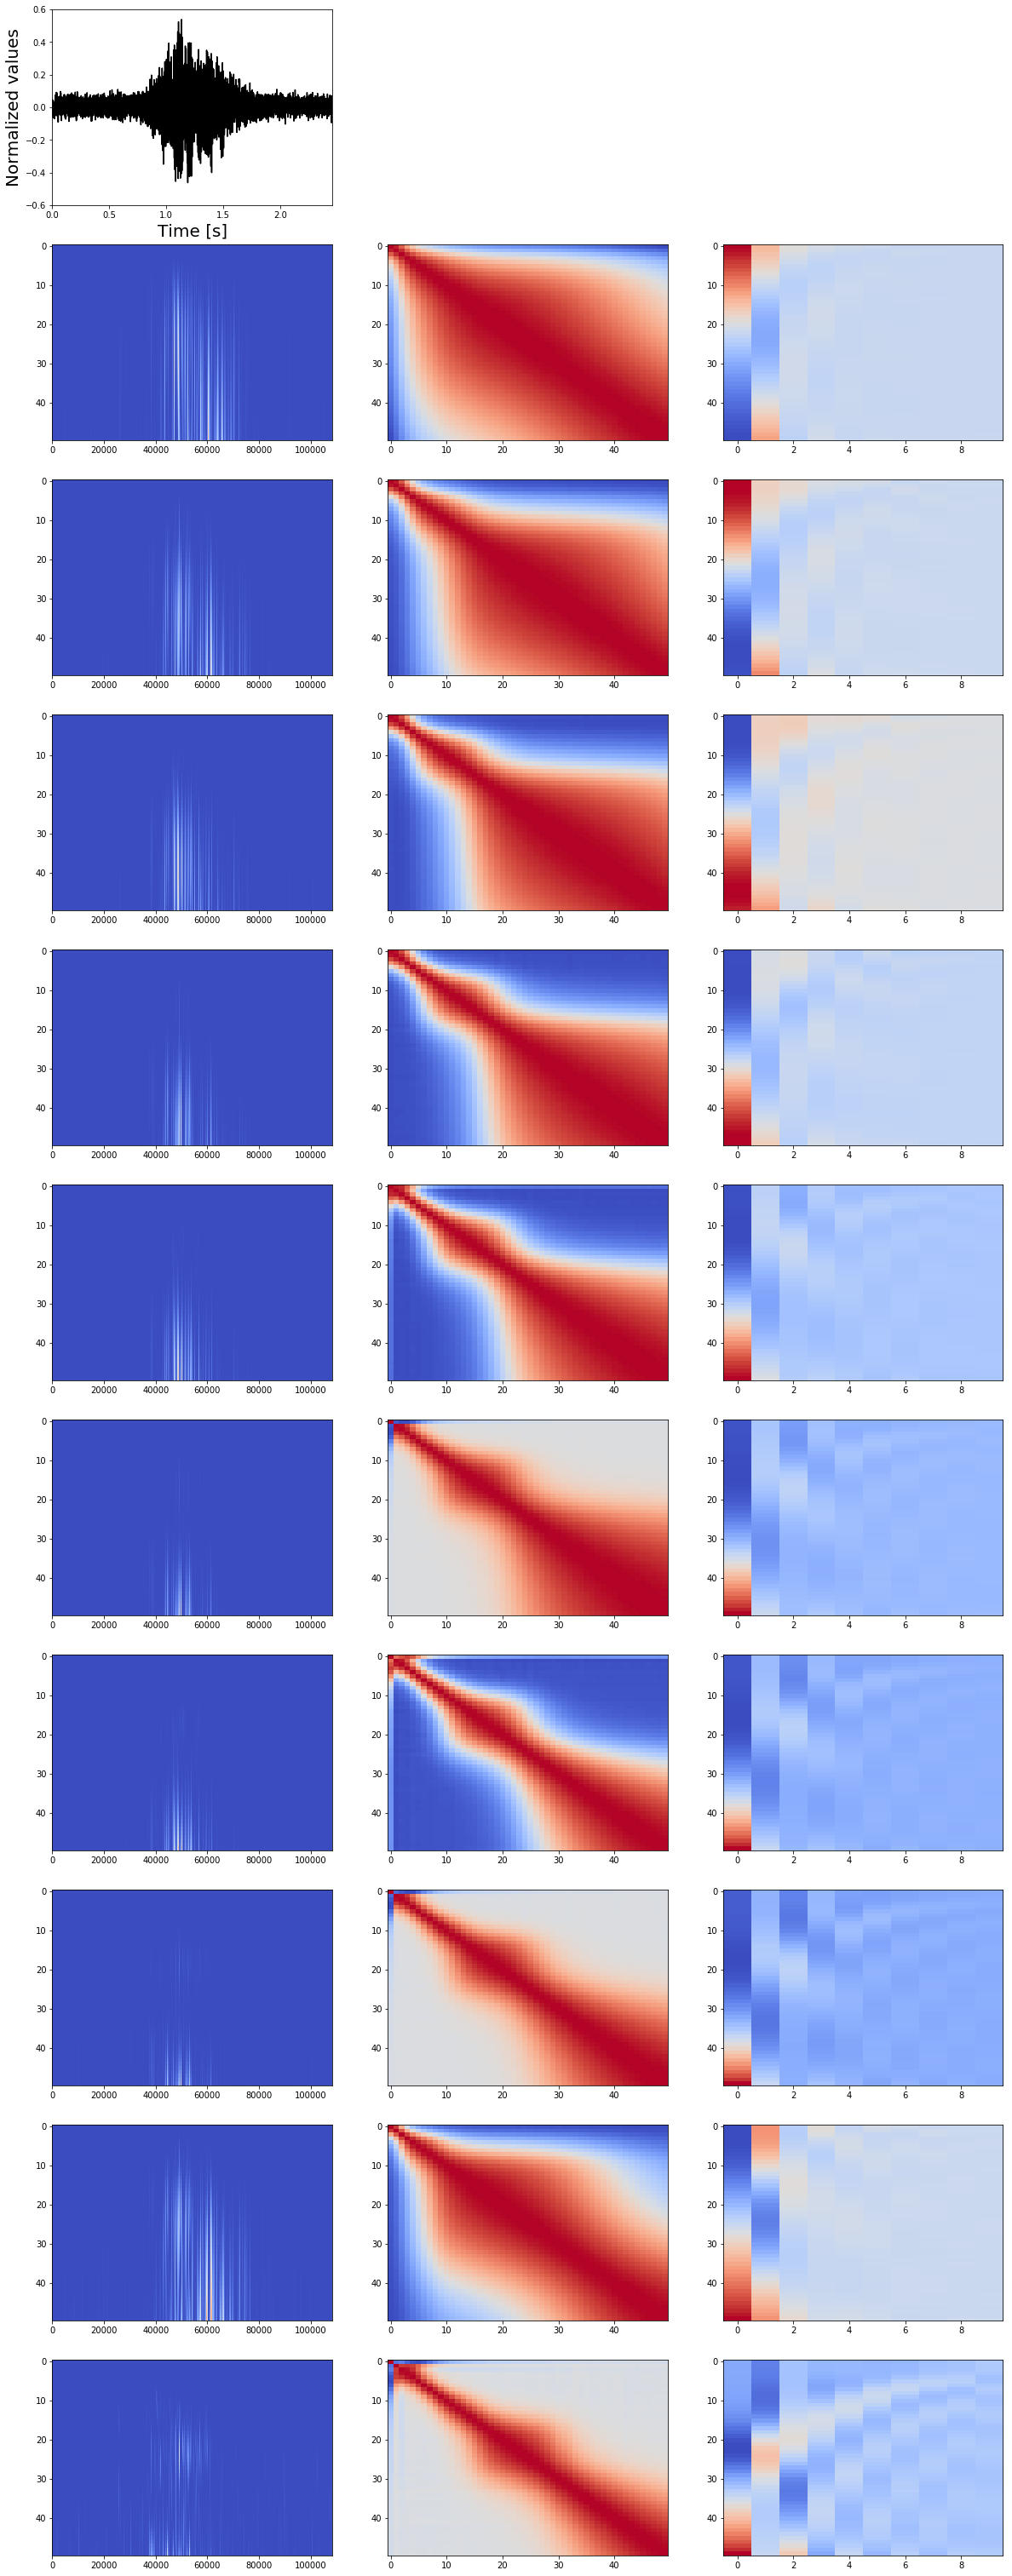

In [403]:
#print(pywt.wavelist())
index   = 20
nscales = 50
pca     = PCA(n_components=10)
audio   = np.array(audio_data[index] / (max(audio_data[index]) - min(audio_data[index])))
time    = np.arange(0, audio.size) / ref_samplerate # seconds
scales  = np.arange(1, nscales + 1)
coeff   = {}
A       = {}
feat    = {}
cumvar  = {}
wtlist  = ['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl']

for wt in (wtlist):
    coeff[wt]  = pywt.cwt(audio_data[index], scales=scales, wavelet=wt)
    A[wt]      = np.corrcoef(coeff[wt][0])
    feat[wt]   = pca.fit_transform(coeff[wt][0])
    cumvar[wt] = np.cumsum( pca.explained_variance_ratio_ ) 
    print('Testing mother wavelet: {:6s} - Cumvar=\t{:.2f} '.format(wt,cumvar[wt][-1]))
         
# Plot
ncols = 3
nrows = len(wtlist) + 1

plt.figure(1, figsize=(20, 5 * nrows))

# wav file
ax1 = plt.subplot(nrows, ncols, 1)
ax1.set_xlabel('Time [s]', size=20)
ax1.set_ylabel('Normalized values', size=20)
ax1.set_xlim(0,time[-1])
ax1.set_ylim(-0.6, 0.6)
ax1.plot(time, audio, c='black')  

for i in range(len(wtlist)):
    # wavelet
    plt.subplot(nrows, ncols, (i * ncols) + 4)
    plt.imshow(coeff[wtlist[i]][0]**2, cmap='coolwarm', aspect='auto') 

    # Correlation between wavelet scales
    plt.subplot(nrows, ncols, (i * ncols) + 5)
    plt.imshow(A[wtlist[i]], cmap='coolwarm', aspect='auto')  

    # PCA of correlation
    plt.subplot(nrows, ncols, (i * ncols) + 6)
    plt.imshow(feat[wtlist[i]], cmap='coolwarm', aspect='auto') 

plt.show()

In [42]:
coeff = [ pywt.cwt(audio_data[ take[i] ][:take_size[i]], scales, 'morl') for i in range(ntakes) ]

In [ ]:
# calculate wavelet coefficient
coeff = [ pywt.cwt(audio_data[ take[i] ][:take_size[i]], scales, 'morl') for i in range(ntakes) ]

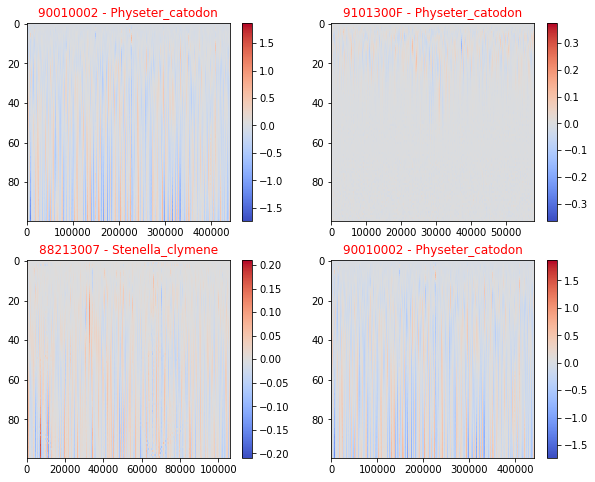

In [43]:
# Plot 2D scaleogram
plt.figure(1, figsize=(10,size))
for i in range(ntakes):
    plt.subplot(nplots + i)
    plt.title(file_list[take[i]] + ' - ' + names[take[i]], color='r')
    plt.imshow(coeff[i][0], cmap='coolwarm', aspect='auto')  
    plt.colorbar()

plt.show()

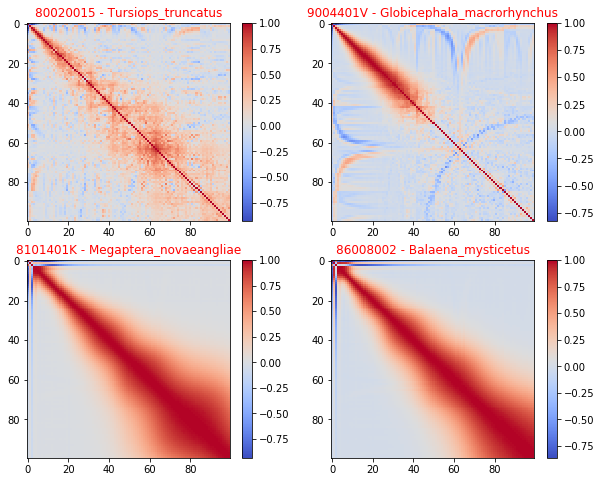

In [15]:
# Plot correlation matrix between scales
plt.figure(1, figsize=(10,size))
for i in range(ntakes):
    mu = np.mean(coeff[i][0], axis=1, keepdims=True)
    sd = np.std(coeff[i][0], axis=1, keepdims=True)
    wavelet = (coeff[i][0] - mu) / sd
    A=np.corrcoef(coeff[i][0]) #np.dot(wavelet, wavelet.T)

    #A=np.dot(wavelet, wavelet.T)
    plt.subplot(nplots + i)
    plt.title(file_list[take[i]] + ' - ' + names[take[i]], color='r')
    plt.imshow(A, cmap='coolwarm', aspect='auto')  
    plt.colorbar()

plt.show()

### 4.3.2 Role of scale parameter

Higher scales represents noise for click/whistle sound type and it is propagated to PCA pics. Lower scales contain the signal.

Cumvar=	0.87


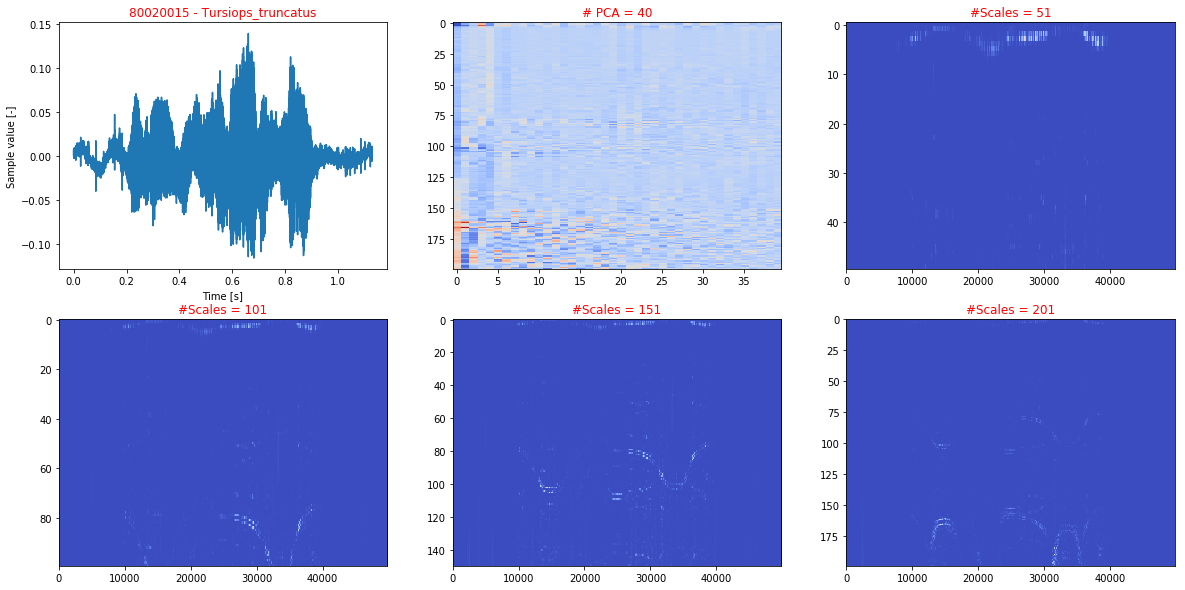

In [31]:
sample = 0
nplots = 231

plt.figure(1, figsize=(20,10))

button_list = []
pca_features = []
npca= 40
pca = PCA(n_components=npca)

# calculate wavelet coefficient
for i in range(4):
    nscales = 50 * (i + 1) + 1
    scales = np.arange(1, nscales)
    
    # Calculate wavelet transform
    coeff, freqs = pywt.cwt(audio_data[ take[sample] ][:take_size[sample]], scales, 'morl')
    
    # Get first PCA components
    if(nscales is 201):
        pca_features = pca.fit_transform(coeff)
        cumvar = np.cumsum( pca.explained_variance_ratio_ ) 
        print("Cumvar=\t{:.2f}".format(cumvar[-1]))
    
    plt.subplot(nplots + i + 2)
    plt.title('#Scales = ' + str(nscales), color='r')
    plt.imshow(np.power(coeff,2), cmap='coolwarm', aspect='auto')  # coeff[0] .reshape(100,100)

# target sample
audio = audio_data[take[sample]]
file=file_list[take[sample]] + ' - ' + str(names[take[sample]])
time = np.arange(0, audio.size) / ref_samplerate # seconds
  
# Plot
plt.subplot(nplots); 
plt.plot(time, audio)
plt.xlabel('Time [s]')
plt.ylabel('Sample value [-]')
plt.title(file, color='r')

# play button
button = widgets.Button(description=file, button_style='info')
button.on_click(callback=make_play_method(audio, samplerate))
button_list.append(button)


plt.subplot(nplots + 1)
plt.title('# PCA = ' + str(npca), color='r')

plt.imshow(pca_features, cmap='coolwarm', aspect='auto') 

plt.show()
HBox(button_list)


### 4.3.3 Role of scale parameter

keeping 1/6 of scales improves PCA pic relevance

Cumvar10 = 1.00


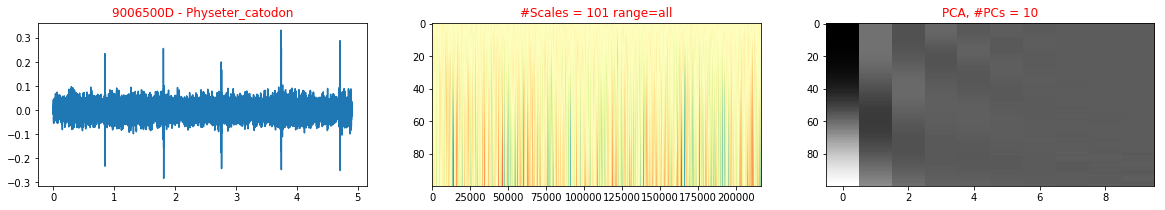

In [69]:
sample = 2
nplots = 131
nscales = 101
scales = np.arange(1, nscales)
npca   = 10

# Calculate wavelet transform
coeff, freqs = pywt.cwt(audio_data[ take[sample] ][:take_size[sample]], scales, wavelet='mexh')

# PCA: #PC1 = scales; #PC2 = scales / 5
pca = PCA(n_components=npca)
pc  = pca.fit_transform(coeff**2)
print("Cumvar{:d} = {:.2f}".format(npca, np.cumsum( pca.explained_variance_ratio_ )[-1] ))

# Plots 
plt.figure(1, figsize=(20,3))

# Time domain
audio = audio_data[take[sample]]
file=file_list[take[sample]] + ' - ' + str(names[take[sample]])
time = np.arange(0, audio.size) / ref_samplerate # seconds
  
plt.plot(time, audio)
plt.subplot(nplots)
plt.title(file, color='r')
plt.plot(time, audio)

# Time/frequency domain
plt.subplot(nplots + 1)
plt.title('#Scales = ' + str(nscales) + ' range=all', color='r')
plt.imshow(coeff, cmap='Spectral_r', aspect='auto')

# pca 
plt.subplot(nplots + 2)
plt.title('PCA, #PCs = ' + str(npca), color='r')
plt.imshow(pc, cmap='gray', aspect='auto')
plt.show()

# 5. ETL

Read wav and metadata, extract PCA components and store database in HDF format. Process is run in parallel

In [128]:
# Convert wav stero to mono
def to_mono(data):
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    return data

# Re-sample samplerate to target value
def resampling(data, samplerate, target_samplerate):
    if (samplerate != target_samplerate):
        data = librosa.resample(data, samplerate, target_samplerate)
        samplerate = target_samplerate
    return data, samplerate

# Extract metadata info
def process_metadata(name):
    
    listof_fields = []
    listof_data = []
    
    try:
        soup = BeautifulSoup(open('./dataset_watkins/' + name + '.cfm'), "html.parser")
        link = soup.p.a
        link.decompose()
    
        for tr in soup.find_all('tr')[2:]:
            field = tr.find_all('td')[0].text.strip(':')
            data  = tr.find_all('td')[1].text

            if('GS' in field):
                data = "_".join(data.split(' ')[:2])

            listof_fields.append( field )
            listof_data.append( data )                
                
    except:
        print("Unable in processing Meta file {:s} . Skipping.".format(name)) 
        
    return listof_fields, listof_data

# Extract wav data and process PCA
def process_audio4dataframe(name):

    samplerate = 0
    nscales    = 101
    sampleref  = 44100
    minsize    = 20000
    pcs        = 0
    npca       = 10
    pca        = PCA(n_components=npca)
    scales     = np.arange(1, nscales)

    
    # Read wav and metadata
    try:
        # Read wav data
        data, samplerate = sf.read(name, always_2d=True)

        # Convert data to mono 
        data = to_mono(data)

        # Resample data to the target frequency
        data, samplenew = resampling(data, samplerate, sampleref)

        # Calculate wavelet transform
        coeff, freqs = pywt.cwt(data, scales, 'morl') 
        
        # PCA transform
        pcs = pca.fit_transform(coeff).flatten()
        
        # Evaluate linear explained variance
        cumvar = np.cumsum( pca.explained_variance_ratio_ )[-1]

    except:
        data = None
        print("Unable in processing wav file {:s} . Skipping.".format(name)) 

    return pcs, cumvar, samplerate if data is not None else None, 

# Wrapper function. It return a dataframe with data contained in the 'file_list'
def ETL_watkins (file_list):

    # Collectors
    colnames = None  
    df       = None
    dataset  = []
    features = []
    cumvar   = []

    # Collect data
    for name in file_list:
        
        # Read wav and metadata   
        pca, cvar, samplerate = process_audio4dataframe('./dataset_watkins/' + name + '.wav')
        fields, metadata = process_metadata(name) 

        # record the list of fields
        if(colnames is None and fields):
            colnames = fields

        # Keep audio if both wav and metadata are available and sound file is above a defined size
        if(features is not None and metadata):
            dataset.append(metadata) 
            features.append(pca)
            cumvar.append(cvar)

    # Init dataframe
    df = pd.DataFrame(data=dataset, columns=colnames)
    df['features'] = features
    df['cumvar']   = cumvar

    return df

In [13]:
# Set-up batches
nprocesses = 2
nfiles     = 20
step       = int(nfiles / nprocesses)

file_list = [ x.split('.')[0] for x in os.listdir('./dataset_watkins/') if '.wav' in x ]
batches = [ file_list[x:x+5] for x in range(0, 20, 10)]

print('# Processes:\t{:d}\n# Files:\t{:d}\nBatch size:\t{:d}\n'.format(nprocesses, nfiles, step))


# Processes:	2
# Files:	20
Batch size:	10



In [14]:
# Broadcast ETL to #processes
pool    = mp.Pool(processes=2)
results = [ pool.apply_async(ETL_watkins, args=(x,)) for x in batches ]
output  = [ p.get() for p in results ]

Process ForkPoolWorker-8:
Traceback (most recent call last):
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


....

KeyboardInterrupt: 

Process ForkPoolWorker-7:
Traceback (most recent call last):
  File "<ipython-input-5-e57ab8960e11>", line 65, in process_audio4dataframe
    pca_features = pca.fit_transform(coeff).flatten()
  File "/home/panino/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/pca.py", line 348, in fit_transform
    U, S, V = self._fit(X)
  File "/home/panino/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/pca.py", line 392, in _fit
    return self._fit_full(X, n_components)
  File "/home/panino/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/pca.py", line 416, in _fit_full
    U, S, V = linalg.svd(X, full_matrices=False)
  File "/home/panino/anaconda3/lib/python3.6/site-packages/scipy/linalg/decomp_svd.py", line 129, in svd
    full_matrices=full_matrices, overwrite_a=overwrite_a)
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/panino/anaconda3/lib/python3.6/multiprocessing/process.py

....

In [20]:
# join all the databases
result = pd.concat(output)

In [ ]:
# Save database
df.to_hdf('balenine.h5', key='df', mode='w')

# 6. Look at the full database

Now that the database is gathered, some general statistics follow. Species are organized within families to siplify classification

In [1]:
parvordini = { 
	'Inia_geoffrensis'               : 'Odontoceti',
	'Crustacea_'                     : 'Noise',
	'Globicephala_'                  : 'Odontoceti',
	'Peponocephala_electra'          : 'Odontoceti',
	'Cystophora_cristata'            : 'Phocidae',
	'Ambient_'                       : 'Noise',
	'Balaenoptera_physalus'          : 'Mysticeta',
	'Lagenorhynchus_acutus'          : 'Odontoceti',
	'Hydrurga_leptonyx'              : 'Phocidae',
	'Lagenorhynchus_albirostris'     : 'Odontoceti',
	'Eumetopias_jubatus'             : 'Otariidae',
	'Phoca_hispida'                  : 'Phocidae',
	'Delphinus_delphis'              : 'Odontoceti',
	'Leptonychotes_weddelli'         : 'Phocidae',
	'Grampus_griseus'                : 'Odontoceti',
	'Orcinus_orca'                   : 'Odontoceti',
	'Homo_sapiens'                   : 'Noise',
	'Enhydra_lutris'                 : 'Noise',
	'Balaena_mysticetus'             : 'Mysticeta',
	'Megaptera_novaeangliae'         : 'Mysticeta',
	'Phoca_fasciata'                 : 'Phocidae',
	'Balaenoptera_acutorostrata'     : 'Mysticeta',
	'Neophocaena_phocaenoides'       : 'Phocidae',
	'Balaenoptera_'                  : 'Mysticeta',
	'Stenella_attenuata'             : 'Odontoceti',
	'Lagenodelphis_hosei'            : 'Odontoceti',
	'Halichoerus_grypus'             : 'Phocidae',
	'Odobenus_rosmarus'              : 'Pinnipedi',
	'Globicephala_macrorhynchus'     : 'Odontoceti',
	'Stenella_clymene'               : 'Odontoceti',
	'Sotalia_fluviatilis'            : 'Odontoceti',
	'Balaenoptera_borealis'          : 'Mysticeta',
	'Eschrichtius_robustus'          : 'Mysticeta',
	'Delphinidae_'                   : 'Odontoceti',
	'Globicephala_melaena'           : 'Odontoceti',
	'Balaenoptera_musculus'          : 'Mysticeta',
	'Stenella_coeruleoalba'          : 'Odontoceti',
	'Stenella_frontalis'             : 'Odontoceti',
	'Aptenodytes_forsteri'           : 'Noise',
	'Tursiops_catalania'             : 'Odontoceti',
	'Lagenorhynchus_'                : 'Odontoceti',
	'Phoca_largha'                   : 'Phocidae',
	'Globicephala_scammoni'          : 'Odontoceti',
	'Eubalaena_glacialis'            : 'Mysticeta',
	'Trichechus_manatus'             : 'Sirenide',
	'Physeter_catodon'               : 'Odontoceti',
	'Eubalaena_australis'            : 'Mysticeta',
	'Arctocephalus_forsteri'         : 'Otariidae',
	'Steno_bredanensis'              : 'Odontoceti',
	'Arctocephalus_philippii'        : 'Otariidae',
	'Cephalorhynchus_heavisidii'     : 'Odontoceti',
	'Ice_'                           : 'Noise',
	'Eleutherodactylus_johnstonei'   : 'Noise',
	'Fish,_sensu'                    : 'Noise',
	'Phocoena_phocoena'              : 'Odontoceti',
	'Cephalorhynchus_commersonii'    : 'Odontoceti',
	'Leptonychotes_weddellii'        : 'Phocidae',
	'Ommatophoca_rossi'              : 'Phocidae',
	'Aves_'                          : 'Noise',
	'Pseudorca_crassidens'           : 'Odontoceti',
	'Monodon_monoceros'              : 'Odontoceti',
	'Stenella_longirostris'          : 'Odontoceti',
	'Tursiops_truncatus'             : 'Odontoceti',
	'Caperea_marginata'              : 'Mysticeta',
	'Erignathus_barbatus'            : 'Phocidae',
	'Delphinapterus_leucas'          : 'Odontoceti',
	'Phoca_groenlandica'             : 'Phocidae',
    'Sotalia_borneensis'             : 'Odontoceti',
    'Insecta_'                       : 'Noise',
}

families = { 
	'Inia_geoffrensis'               : 'Platanistidae',
	'Globicephala_'                  : 'Delphinidae',
	'Peponocephala_electra'          : 'Delphinidae',
	'Balaenoptera_physalus'          : 'Balaenopteridae',
	'Lagenorhynchus_acutus'          : 'Delphinidae',
	'Lagenorhynchus_albirostris'     : 'Delphinidae',
	'Delphinus_delphis'              : 'Delphinidae',
	'Grampus_griseus'                : 'Delphinidae',
	'Orcinus_orca'                   : 'Delphinidae',
	'Balaena_mysticetus'             : 'Balaenidae',
	'Megaptera_novaeangliae'         : 'Balaenopteridae',
	'Balaenoptera_acutorostrata'     : 'Balaenopteridae',
	'Balaenoptera_'                  : 'Balaenopteridae',
	'Stenella_attenuata'             : 'Delphinidae',
	'Lagenodelphis_hosei'            : 'Delphinidae',
	'Globicephala_macrorhynchus'     : 'Delphinidae',
	'Stenella_clymene'               : 'Delphinidae',
	'Sotalia_fluviatilis'            : 'Delphinidae',
	'Balaenoptera_borealis'          : 'Balaenopteridae',
	'Eschrichtius_robustus'          : 'Eschrichtiidae',
	'Delphinidae_'                   : 'Delphinidae',
	'Globicephala_melaena'           : 'Delphinidae',
	'Balaenoptera_musculus'          : 'Balaenopteridae',
	'Stenella_coeruleoalba'          : 'Delphinidae',
	'Stenella_frontalis'             : 'Delphinidae',
	'Tursiops_catalania'             : 'Delphinidae',
	'Lagenorhynchus_'                : 'Delphinidae',
	'Globicephala_scammoni'          : 'Delphinidae',
	'Eubalaena_glacialis'            : 'Balaenidae',
	'Physeter_catodon'               : 'Physeteridae',
	'Eubalaena_australis'            : 'Balaenidae',
	'Steno_bredanensis'              : 'Delphinidae',
	'Cephalorhynchus_heavisidii'     : 'Delphinidae',
	'Phocoena_phocoena'              : 'Phocoeinade',
	'Cephalorhynchus_commersonii'    : 'Delphinidae',
	'Pseudorca_crassidens'           : 'Delphinidae',
	'Monodon_monoceros'              : 'Monodontidae',
	'Stenella_longirostris'          : 'Delphinidae',
	'Tursiops_truncatus'             : 'Delphinidae',
	'Caperea_marginata'              : 'Balaenidae',
	'Delphinapterus_leucas'          : 'Delphinidae',
    'Sotalia_borneensis'             : 'Delphinidae',
}

subfamilies = { 
	'Globicephala_'                  : 'Globicephalinae',
	'Peponocephala_electra'          : 'Globicephalinae',
	'Lagenorhynchus_acutus'          : 'Lissodelphininae',
	'Lagenorhynchus_albirostris'     : 'Lissodelphininae',
	'Delphinus_delphis'              : 'Delphininae',
	'Grampus_griseus'                : 'Globicephalinae',
	'Orcinus_orca'                   : 'Orcininae',
	'Balaena_mysticetus'             : 'Balaenidae',
	'Eubalaena_glacialis'            : 'Balaenidae',
	'Eubalaena_australis'            : 'Balaenidae',
	'Caperea_marginata'              : 'Balaenidae',
    'Megaptera_novaeangliae'         : 'Balaenopteridae',
	'Balaenoptera_acutorostrata'     : 'Balaenopteridae',
	'Balaenoptera_'                  : 'Balaenopteridae',
	'Balaenoptera_borealis'          : 'Balaenopteridae',
	'Balaenoptera_musculus'          : 'Balaenopteridae',
	'Balaenoptera_physalus'          : 'Balaenopteridae',
	'Stenella_attenuata'             : 'Delphininae',
	'Lagenodelphis_hosei'            : 'Delphininae',
	'Globicephala_macrorhynchus'     : 'Globicephalinae',
	'Stenella_clymene'               : 'Delphininae',
	'Sotalia_fluviatilis'            : 'Stenoninae',
	'Delphinidae_'                   : 'Delphininae',
	'Globicephala_melaena'           : 'Globicephalinae',
	'Stenella_coeruleoalba'          : 'Delphininae',
	'Stenella_frontalis'             : 'Delphininae',
	'Tursiops_catalania'             : 'Delphininae',
	'Lagenorhynchus_'                : 'Lissodelphininae',
	'Globicephala_scammoni'          : 'Globicephalinae',
	'Physeter_catodon'               : 'Physeteridae',
	'Steno_bredanensis'              : 'Delphininae',
	'Cephalorhynchus_heavisidii'     : 'Lissodelphininae',
	'Phocoena_phocoena'              : 'Phocoeinade',
	'Cephalorhynchus_commersonii'    : 'Lissodelphininae',
	'Pseudorca_crassidens'           : 'Globicephalinae',
	'Monodon_monoceros'              : 'Delphinapterus',
	'Stenella_longirostris'          : 'Delphininae',
	'Tursiops_truncatus'             : 'Delphininae',
	'Delphinapterus_leucas'          : 'Delphininae',
    'Sotalia_borneensis'             : 'Stenoninae',
}

In [2]:
f = h5py.File(database, 'r')
df_list =[ pd.read_hdf(database, key=key) for key in f.keys() ]

# join all the databases
df = pd.concat(df_list)
df = df.reset_index(drop=True)

# Add species' parvordini
df['parvordini'] = df.GS.apply(lambda x: parvordini[x])

# Set categories for species
species_type  = set(df['GS'])
categories_species = range(len(species_type))
categories_species_dict = dict(zip(species_type, categories_species))
df['labels_species'] = df.GS.apply(lambda x: categories_species_dict[x])

df = df.drop(df.index[5640])

NameError: name 'h5py' is not defined

In [4]:
# Save file in csv format without features
df[['RN', 'CU', 'NC', 'SR', 'CS', 'PL', 'SC', 'ID', 'AG', 'IA', 'GS', 'GA',
    'OD', 'NT', 'DA', 'IP', 'AP', 'BH', 'OS', 'NA', 'GB', 'GC', 'OT', 'SH',
    'AU', 'LO', 'HY', 'RC', 'RG', 'SL', 'ST', 'cumvar', 'labels', 'labels_species']].to_csv('prova.dat')

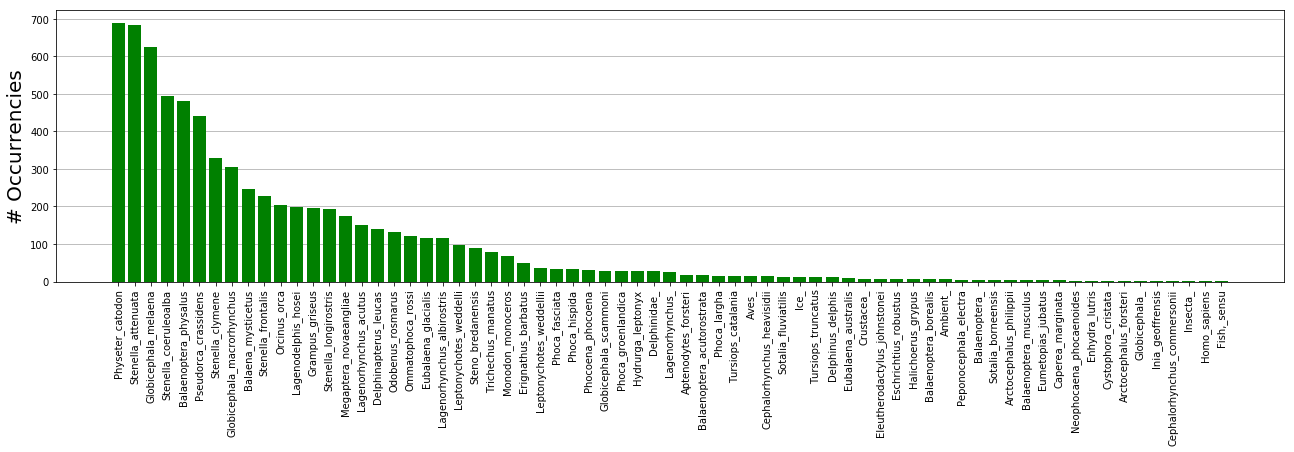

In [4]:
# Distribution of species's occurrencies in given dataset
occurrency = df.GS.value_counts()
species_name = df.GS.value_counts().keys().tolist()

fig = plt.figure(figsize=(22, 5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(species_name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=90)
plt.show()

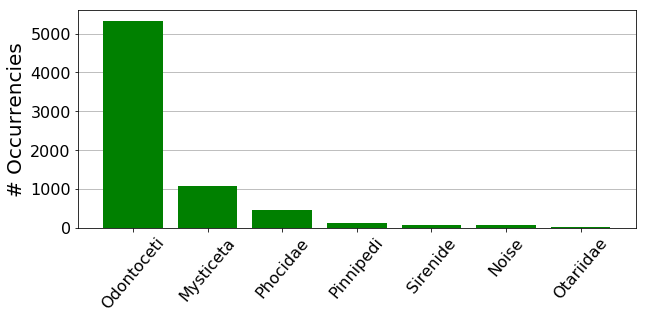

In [5]:
# Distribution of parvordini's occurrencies in given dataset
occurrency = df.parvordini.value_counts()
parvordini_name = df.parvordini.value_counts().keys().tolist()

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(parvordini_name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

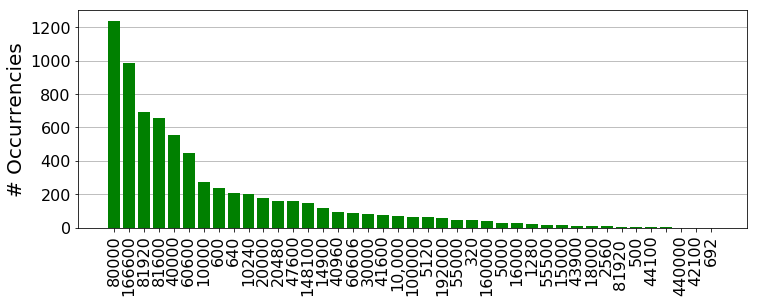

In [8]:
# Distribution of samplerate
occurrency = df.SR.value_counts()
SR_name = df.SR.value_counts().keys().tolist()

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(SR_name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

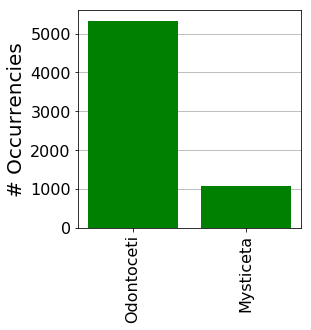

In [6]:
# Remove parvordini with very low number of samples
drop_list = ['Phocidae', 'Otariidae', 'Pinnipedi', 'Sirenide', 'Noise']

for item in drop_list:
    df = df[df.parvordini != item]

# Set categories for parvordini
parvordini_type  = set(df['parvordini'])
categories_parvordini = range(len(parvordini_type))
categories_parvordini_dict = dict(zip(parvordini_type, categories_parvordini))
df['labels_parvordini'] = df.parvordini.apply(lambda x: categories_parvordini_dict[x])

# Distribution of species's occurrencies in given dataset
occurrency = df.parvordini.value_counts()
name = df.parvordini.value_counts().keys().tolist()
num_classes = len(parvordini_name)

# Reverse dictionary for later classification
inv_categories_parvordini_dict = {v: k for k, v in categories_parvordini_dict.items()}

# check
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

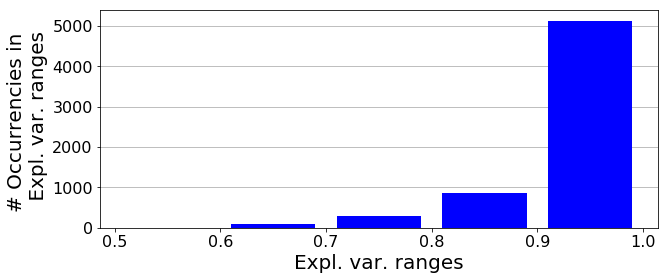

In [8]:
# Explained variance for given dataset, scale and PCA parameters
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Expl. var. ranges', fontsize=20)
ax1.set_ylabel('# Occurrencies in \n Expl. var. ranges', fontsize=20)
ax1.set_axisbelow(True)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax1.hist(df.cumvar, bins=np.arange(0.5, 1.01, 0.1).tolist(), rwidth=0.8, color='b')
plt.grid(b=True, axis='y')
plt.show()

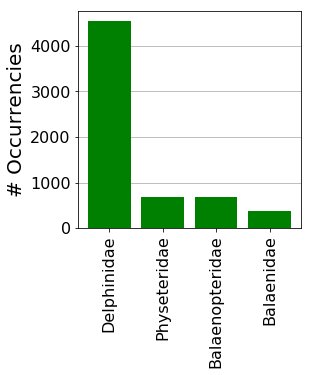

In [7]:
# Add species' families
df['families'] = df.GS.apply(lambda x: families[x])

# Remove families with very low number of samples
drop_list = ['Monodontidae', 'Platanistidae', 'Eschrichtiidae', 'Phocoeinade']
for item in drop_list:
    df = df[df.families != item]

# Set categories for families and assign labels
families_type  = set(df['families'])
categories_families = range(len(families_type))
categories_families_dict = dict(zip(families_type, categories_families))
df['labels_families'] = df.families.apply(lambda x: categories_families_dict[x])
num_classes = len(families_type)

# Reverse dictionary for later classification
inv_categories_families_dict = {v: k for k, v in categories_families_dict.items()}

# Distribution of species's occurrencies in given dataset
occurrency = df.families.value_counts()
name = df.families.value_counts().keys().tolist()
num_classes = len(families_type)

# check
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

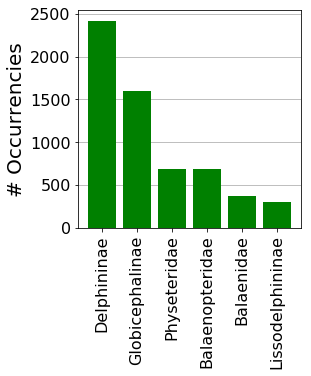

In [8]:
# Add species' families
df['subfamilies'] = df.GS.apply(lambda x: subfamilies[x])

# Remove families with very low number of samples
drop_list = ['Stenoninae', 'Orcininae', 'Eschrichtiidae', 'Phocoeinade']
for item in drop_list:
    df = df[df.subfamilies != item]

# Set categories for families and assign labels
subfamilies_type  = set(df['subfamilies'])
categories_subfamilies = range(len(subfamilies_type))
categories_subfamilies_dict = dict(zip(subfamilies_type, categories_subfamilies))
df['labels_subfamilies'] = df.subfamilies.apply(lambda x: categories_subfamilies_dict[x])
num_classes = len(subfamilies_type)

# Reverse dictionary for later classification
inv_categories_subfamilies_dict = {v: k for k, v in categories_subfamilies_dict.items()}

# Distribution of species's occurrencies in given dataset
occurrency = df.subfamilies.value_counts()
name = df.subfamilies.value_counts().keys().tolist()
num_classes = len(subfamilies_type)

# check
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

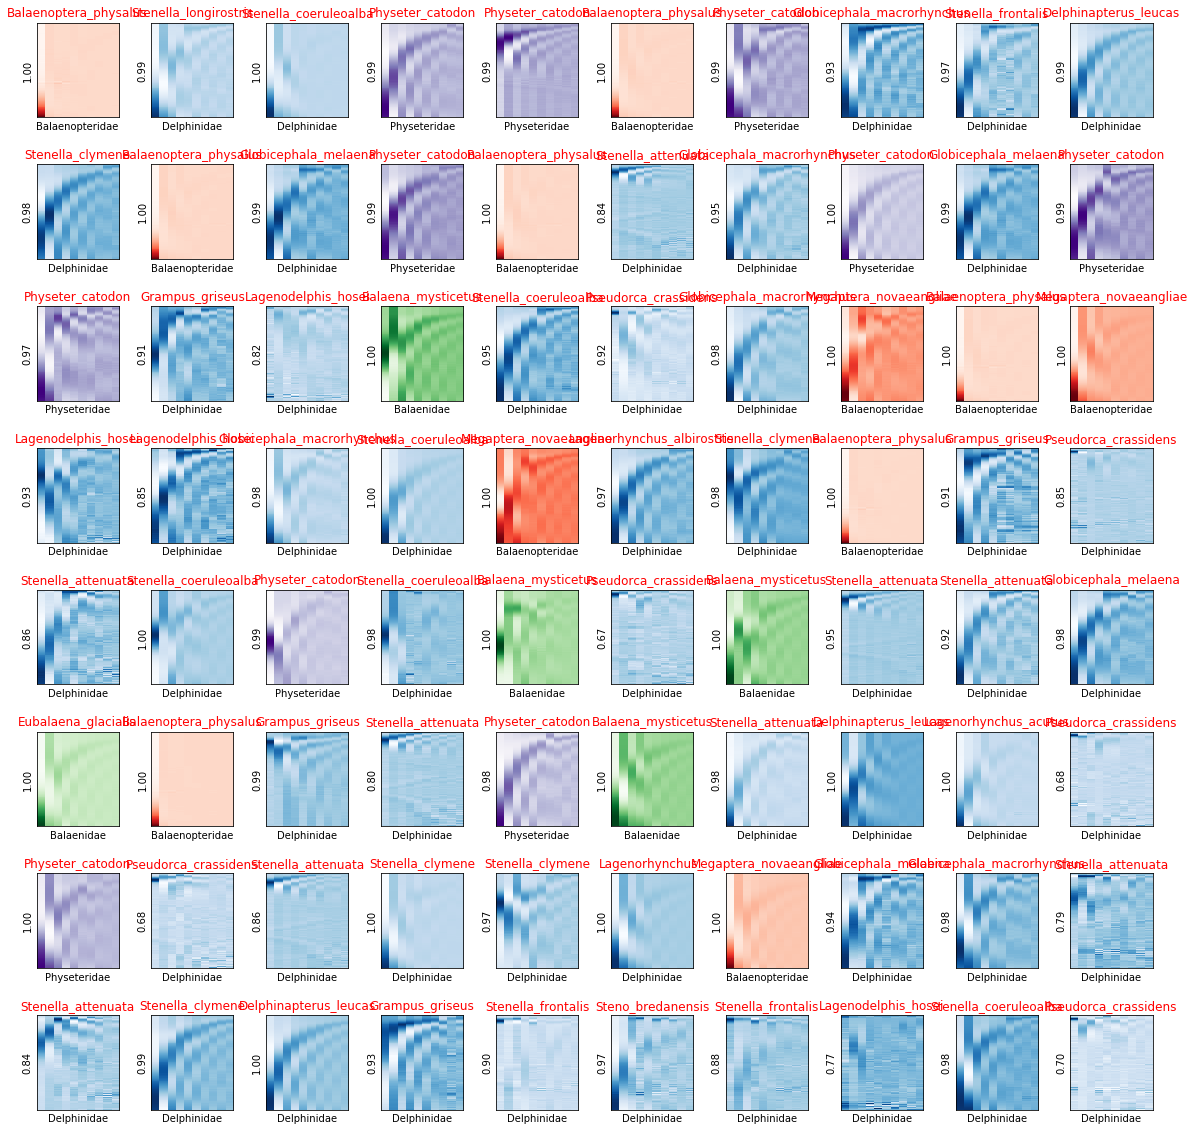

In [10]:
# Look at feature space
cmap = {
    'Balaenopteridae' : 'Reds',
    'Balaenidae'      : 'Greens',
    'Delphinidae'     : 'Blues',
    'Physeteridae'    : 'Purples',
}

# Check images
plt.figure(1, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
nrows = 8
ncols = 10
df1   = df.reset_index(drop=True)

for i in range(nrows * ncols):
    index = np.random.randint(df1.features.count())
    
    plt.subplot(nrows, ncols, i + 1)
    plt.title(df1.GS[index], color='r')
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(df1.families[index])
    plt.ylabel("{:.2f}".format(df1.cumvar[index]))
    plt.imshow(df1.features[index].reshape(nscales, npca), cmap=cmap[df1.families[index]], aspect='auto')
    
plt.show()

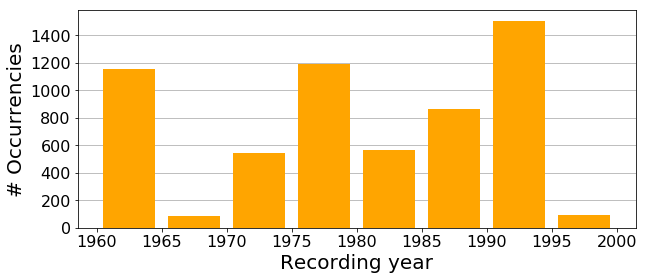

In [11]:
# Time of recording
date_list = []
for x in df.OD.tolist():
        date = x[0:13].split()[0].split('-')
        if(len(date) == 3):
            date = int( date[-1] )
            if(date < 100):
                date += 1900
            date_list.append( date )
 
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_xlabel('Recording year', fontsize=20)
ax1.set_axisbelow(True)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax1.hist(date_list, bins=range(1960, 2005, 5), rwidth=0.8, color='orange')
plt.grid(b=True, axis='y')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


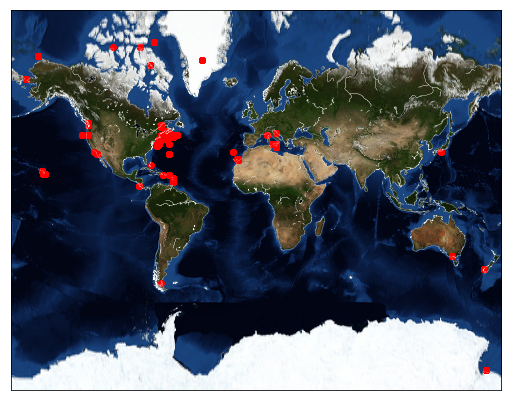

In [25]:
# Collect latitude / longitude 
latitude = []
longitude = []
for coord in df.GC.tolist():
    try:
        lat = int( coord.split(' ')[0][0:3].replace('N', '+').replace('S', '-') )
        lon = int(coord.split(' ')[2][0:4].replace('W', '-').replace('E', '+') )
        if( isinstance(lat, int) and isinstance(lon, int)):
            latitude.append( lat )
            longitude.append( float(lon) )
        
    except:
        continue  
        
# Plot location of dataset
fig = plt.figure(figsize=(20, 7))
m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80,  \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='l')
m.bluemarble(scale=0.2)
m.drawcoastlines(color='white', linewidth=0.2)

x, y = m(longitude, latitude)
m.scatter(x, y, marker='o', color='Red')
plt.show()

# 7. Supervised ML - Suborder classification

# 7.1 Select features, labels, train/test subsets

In [9]:
# Features / labels
x = np.array(df['features'].tolist())
y = np.array(df['labels_parvordini'].tolist())

# Split in train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20585, random_state=12341)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')

# Report some info
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (4826, 1000)
4826 train samples
1251 test samples


## 7.2 SVM classification

In [10]:
# Gridsearch
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf'],     'gamma': [0.01, 0.001, 0.0001] },
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['poly'],    'gamma': [0.01, 0.001, 0.0001] },
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001] },
]

# model specification
model = svm.SVC(max_iter=10000)

# Gridsearch fit/test
clf = GridSearchCV(model, param_grid, verbose=2, n_jobs=10)
with parallel_backend('threading'):
    clf.fit(x_train, y_train)

lin_svm_test = clf.score(x_test, y_test)

# Save SVC classification results
pd.DataFrame(clf.cv_results_).to_csv('suborder_SVC_classification_results.csv')

Fitting 3 folds for each of 2 candidates, totalling 6 fits


KeyboardInterrupt: 

In [12]:
#Load dataframe
svc_results = pd.read_csv('suborder_SVC_classification_results.csv')
svc_results.T

0   \
Unnamed: 0                                                     0   
mean_fit_time                                            6.60102   
mean_score_time                                          2.99679   
mean_test_score                                         0.833858   
mean_train_score                                        0.833858   
param_C                                                    0.001   
param_gamma                                                 0.01   
param_kernel                                                 rbf   
params              {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}   
rank_test_score                                               16   
split0_test_score                                       0.833726   
split0_train_score                                      0.833923   
split1_test_score                                       0.833726   
split1_train_score                                      0.833923   
split2_test_score                                        0.83412   
split2_train_score                                      0.833726   
std_fit_time                                            0.186691   
std_score_time                                         0.0733023   
std_test_score                                       0.000185702   
std_train_score                                      9.28142e-05   

                                                               1   \
Unnamed: 0                                                      1   
mean_fit_time                                             5.87678   
mean_score_time                                           2.71064   
mean_test_score                                          0.833858   
mean_train_score                                         0.833858   
param_C                                                     0.001   
param_gamma                                                 0.001   
param_kernel                                                  rbf   
params              {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
rank_test_score                                                16   
split0_test_score                                        0.833726   
split0_train_score                                       0.833923   
split1_test_score                                        0.833726   
split1_train_score                                       0.833923   
split2_test_score                                         0.83412   
split2_train_score                                       0.833726   
std_fit_time                                             0.467537   
std_score_time                                          0.0331502   
std_test_score                                        0.000185702   
std_train_score                                       9.28142e-05   

                                                                2   \
Unnamed: 0                                                       2   
mean_fit_time                                               5.7974   
mean_score_time                                             2.5758   
mean_test_score                                           0.833858   
mean_train_score                                          0.833858   
param_C                                                      0.001   
param_gamma                                                 0.0001   
param_kernel                                                   rbf   
params              {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}   
rank_test_score                                                 16   
split0_test_score                                         0.833726   
split0_train_score                                        0.833923   
split1_test_score                                         0.833726   
split1_train_score                                        0.833923   
split2_test_score                                          0.83412   
split2_train_score                                        0.833

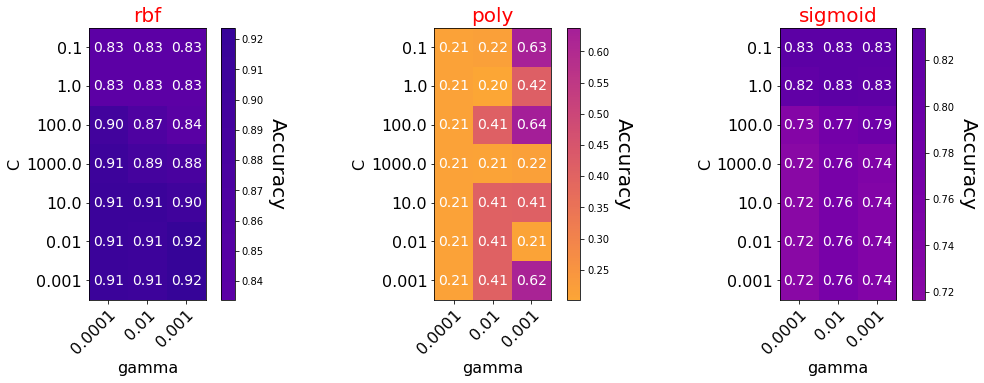

In [5]:
# plot svc results
s = np.array(svc_results.mean_test_score).reshape(3, 7, 3)
z = np.array(svc_results.param_kernel).reshape(3, 7, 3)

plt.figure(1, figsize=(18,5))
plt.subplots_adjust(hspace=0.5, wspace=0.1)
nrows = 1
ncols = 3

for k in range(nrows * ncols):
    ax = plt.subplot(nrows, ncols, k + 1)
    im = ax.imshow(s[k,:,:], cmap='plasma_r')

    # ticks labels and title
    ax.set_title(z[k,0,0], fontsize=20, color='r')
    ax.set_xticks(np.arange(len(set(svc_results.param_gamma))))
    ax.set_yticks(np.arange(len(set(svc_results.param_C))))
    ax.set_xticklabels(set(svc_results.param_gamma), fontsize=16)
    ax.set_yticklabels(set(svc_results.param_C), fontsize=16)
    ax.set_ylabel('C', fontsize=16)
    ax.set_xlabel('gamma', fontsize=16)
    
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom", fontsize=20)
    cbar.set_clim(0., 1)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(7):
        for j in range(3):
            text = ax.text(j, i, "{:.2f}".format(s[k, i, j]), ha="center", va="center", color="white", fontsize=14)

plt.show()

## 7.3 Neural network classification

In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

## 7.2.2 Model 1 - No Hidden layer

Test shows overfitting with #units=512. Using lower number (256, 128 and 64) reduce overfitting. For N=64 overfitting disappear. Batch size has been tested, using values from 10 to 100, but it didn't play relevant role.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

Accuracy: 0.8912698410806201


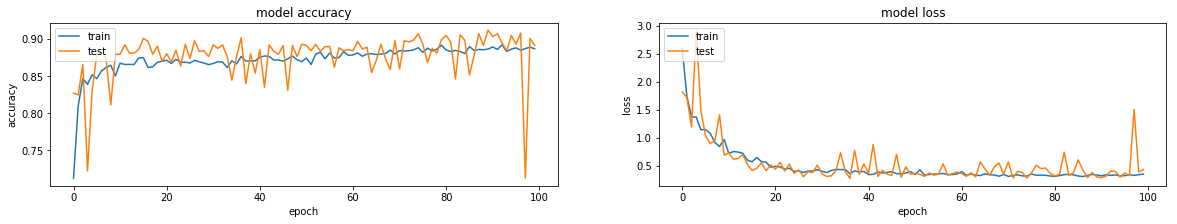

In [33]:
# NN parameters
batch_size    = 100
epochs        = 100

# Model definition
model = Sequential()
model.add(Dense(128, input_shape=(1000,)))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model fit
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(x_test, y_test))

# Calculate score
scores = model.evaluate(x_test, y_test, verbose=0)
print('\nAccuracy:', scores[1])

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### 8.2.2 Model 2 - 1 Hidden layers

Overfitting found in the basic case as the previous model. Using kernel constraint and droupout units improve results and overfit disappeared. #epochs=100 has same accuracy as #epochs=200

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Accuracy: 0.8690476192368402


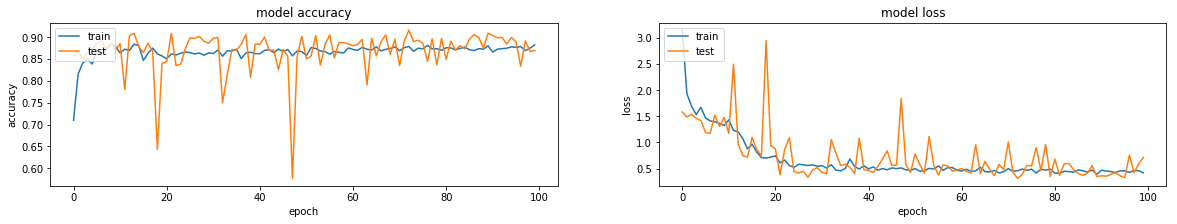

In [34]:
# NN parameters
batch_size    = 100
epochs        = 100

# Model definition
model = Sequential()
model.add(Dense(256, kernel_constraint=max_norm(2.), input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_constraint=max_norm(2.),))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model fit
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(x_test, y_test))

# Calculate score
scores = model.evaluate(x_test, y_test, verbose=0)
print('\nAccuracy:', scores[1])

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### 8.2.3 Hyperparameter tuning

Combination of several activation functions and optimizer. Best results found with relu and adagrad. Accuracy increased from ~86% to ~96% :)

In [106]:
# Define parameter grid
activation_functions_layer_1 = ['sigmoid', 'tanh', 'relu']
optimizers = ['rmsprop', 'adagrad', 'adadelta']
history = []
score   = []

# NN parameters
batch_size    = 500
epochs        = 100

# Optimize over parameter grid (grid search)
for activation in activation_functions_layer_1:
    for optimizer in optimizers:
        print('Now testing (optimizer, activation) = ({:s}, {:s})'.format(optimizer, activation))
        
        # Model definition
        model = Sequential()
        model.add(Dense(256, activation=activation, kernel_constraint=max_norm(2.), input_shape=(1000,)))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation=activation, kernel_constraint=max_norm(2.),))
        model.add(Dense(num_classes, activation='softmax'))
     
        # Compile model
        model.compile(loss='categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
        
        # Model fit
        history.append(model.fit(x_train, y_train,
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 verbose=0,
                                 validation_data=(x_test, y_test)))
        
        score.append(model.evaluate(x_test, y_test, verbose=0)[1])

Now testing (optimizer, activation) = (rmsprop, sigmoid)
Now testing (optimizer, activation) = (adagrad, sigmoid)
Now testing (optimizer, activation) = (adadelta, sigmoid)
Now testing (optimizer, activation) = (rmsprop, tanh)
Now testing (optimizer, activation) = (adagrad, tanh)
Now testing (optimizer, activation) = (adadelta, tanh)
Now testing (optimizer, activation) = (rmsprop, relu)
Now testing (optimizer, activation) = (adagrad, relu)
Now testing (optimizer, activation) = (adadelta, relu)


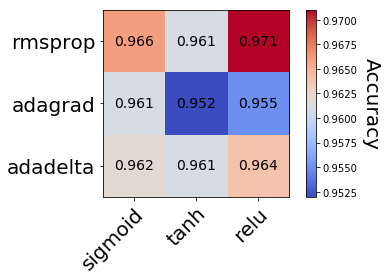

In [113]:
# Plot optimization
scoremat = np.around(np.array(score).reshape(3,3), 3).T
fig, ax = plt.subplots()
im = ax.imshow(scoremat.reshape(3,3), cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(activation_functions_layer_1)))
ax.set_yticks(np.arange(len(optimizers)))

# ... and label them with the respective list entries
ax.set_xticklabels(activation_functions_layer_1, fontsize=20)
ax.set_yticklabels(optimizers, fontsize=20)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom", fontsize=20)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(optimizers)):
    for j in range(len(activation_functions_layer_1)):
        text = ax.text(j, i, scoremat[i, j], ha="center", va="center", color="black", fontsize=14)

fig.tight_layout()
plt.show()

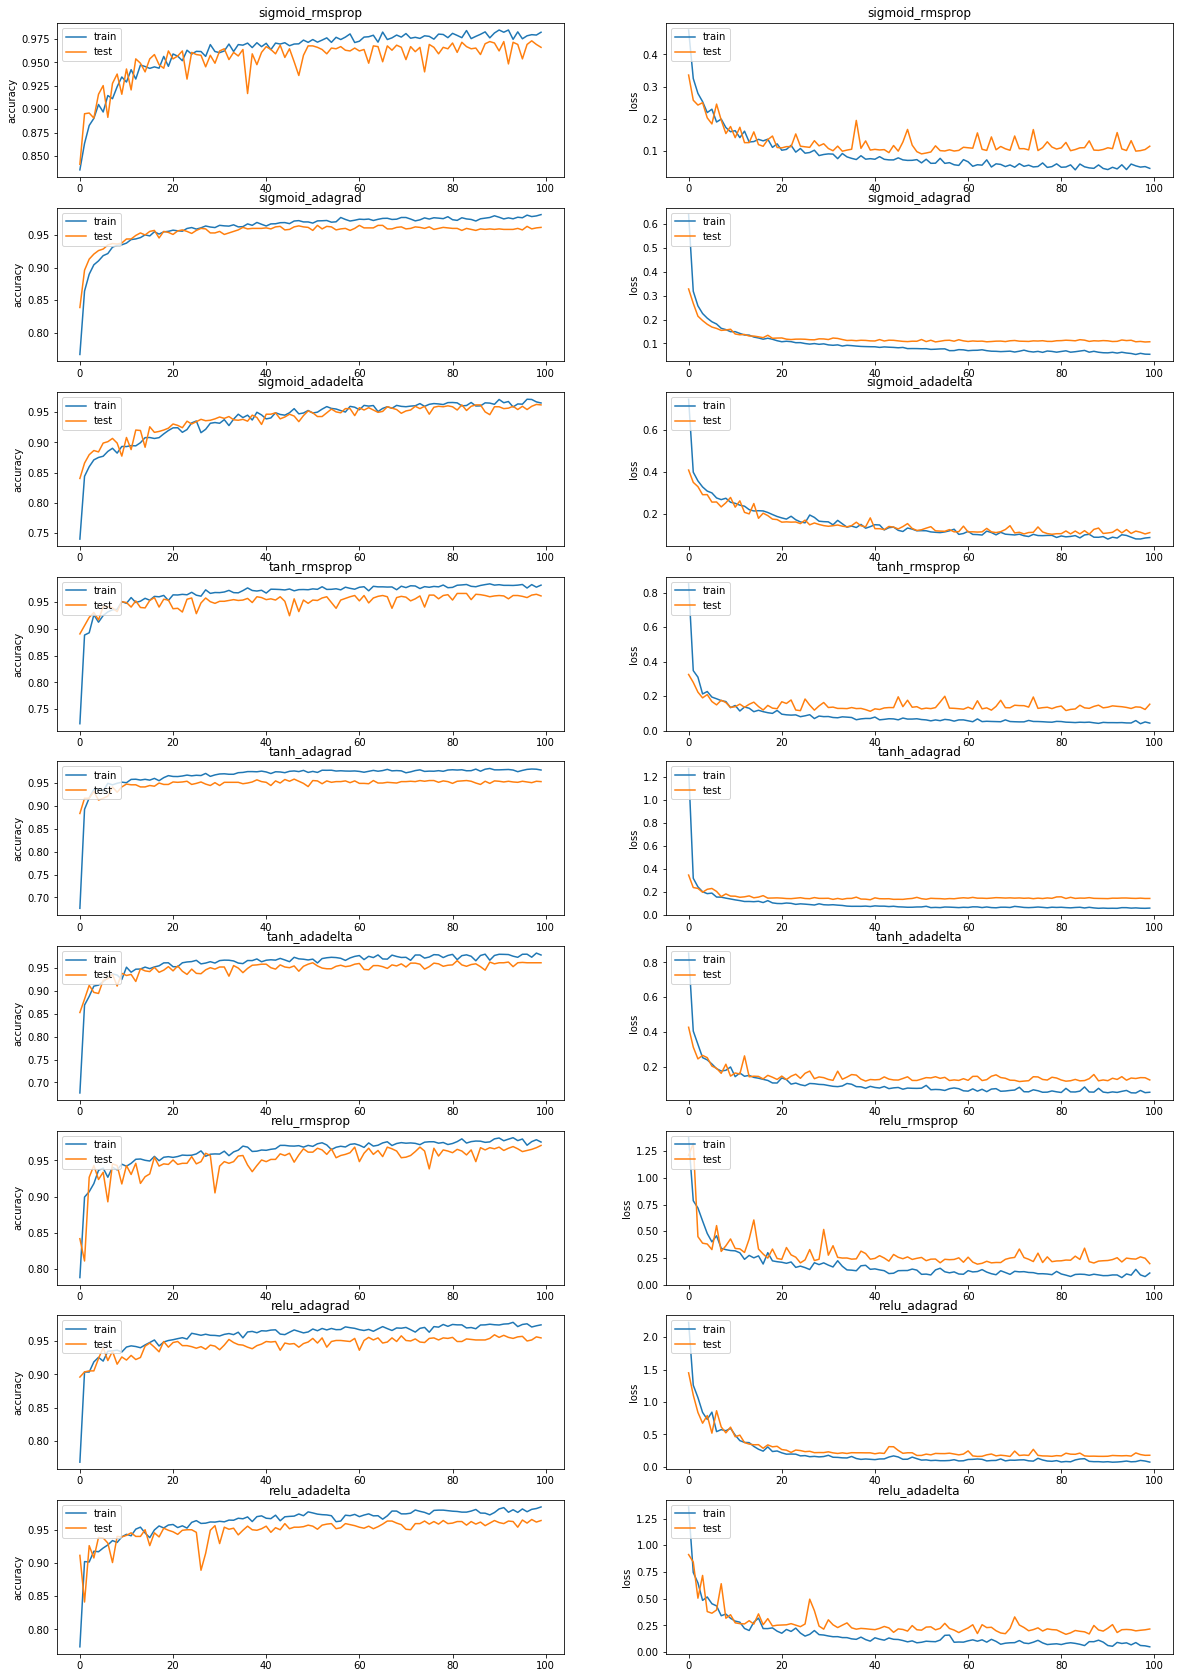

In [114]:
# Plots 
fig = plt.figure(figsize=(20,30))

case_list =[]
for activation in activation_functions_layer_1:
    for optimizer in optimizers:
        case_list.append('_'.join([activation, optimizer]))
        
for i in range(len(case_list)):
        
        # summarize history for accuracy
        ax1 = plt.subplot(9, 2, i * 2 + 1)
        ax1.plot(history[i].history['acc'])
        ax1.plot(history[i].history['val_acc'])
        ax1.set_title(case_list[i])
        ax1.set_ylabel('accuracy')
        ax1.legend(['train', 'test'], loc='upper left')

        # summarize history for loss
        ax2 = plt.subplot(9, 2, i * 2 + 2)
        ax2.plot(history[i].history['loss'])
        ax2.plot(history[i].history['val_loss'])
        ax2.set_title(case_list[i])
        ax2.set_ylabel('loss')
        ax2.legend(['train', 'test'], loc='upper left')

plt.show()

In [417]:
model = Sequential()
model.add(Dense(256, kernel_constraint=max_norm(2.), input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_constraint=max_norm(2.),))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               256256    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 1542      
Total params: 323,590
Trainable params: 323,590
Non-trainable params: 0
_________________________________________________________________


### 8.2.4 Play on optimized parameters

Best accuracy is ~96%


Accuracy: 0.9737856592135697


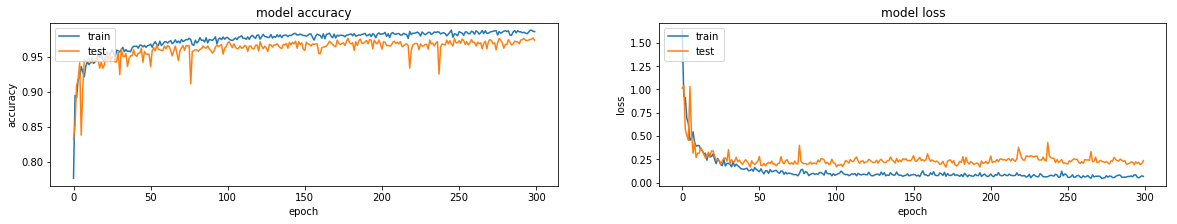

In [118]:
# Model 2: 2 Hidden Layers + dropout + kernel constraint

# NN parameters
batch_size    = 500
epochs        = 300

# Model definition
model = Sequential()
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(2.), input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(2.),))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model fit
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(x_test, y_test))

# Calculate score
scores = model.evaluate(x_test, y_test, verbose=0)

print('\nAccuracy:', scores[1])

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

In [9]:
model = Sequential()
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(2.), input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(2.),))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 322,562
Trainable params: 322,562
Non-trainable params: 0
_______________

### 8.2.5 Train a convolution neural network

Add some convolution layers for improving predictions. Now accuracy reaches~0.98%

(5000, 100, 10, 1)

Accuracy: 0.9814957594448728


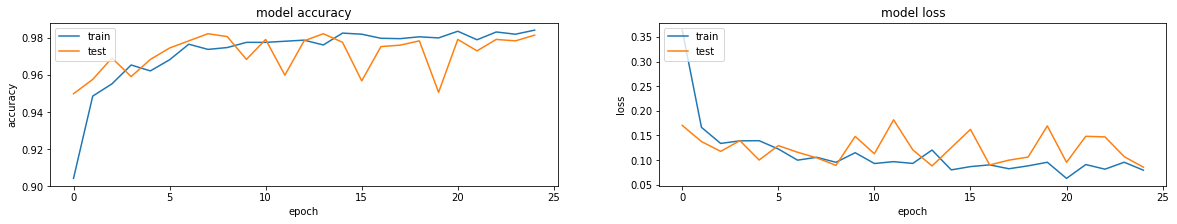

In [125]:
X_train = x_train.reshape((x_train.shape[0], nscales, npca, 1))
X_test  = x_test.reshape((x_test.shape[0], nscales, npca, 1))

print(X_train.shape)
# NN parameters
batch_size    = 500
epochs        = 25
activation    = 'relu'
optimizer     = 'rmsprop'
loss          = 'categorical_crossentropy'

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=(nscales, npca, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation=activation))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation=activation, kernel_constraint=max_norm(2.)))
model.add(Dropout(0.4))
model.add(Dense(256, activation=activation, kernel_constraint=max_norm(2.)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0)

# Calculate score
scores = model.evaluate(X_test, y_test, verbose=0)
print('\nAccuracy:', scores[1])

# Save model
save_path = "Balenine_{:s}_{:s}_{:.3f}.convolution_keras".format(activation, optimizer, scores[1])
model.save(save_path)

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(nscales, npca, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(2.)))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(2.)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 8, 32)         320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 6, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 3, 32)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 3, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
__________

### 8.2.5 Test NN on new files

Load optimized neural network, test it with new wav files

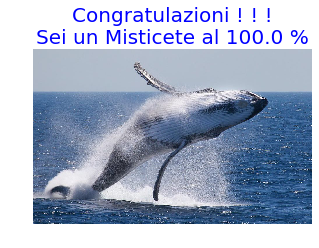

In [131]:
model = load_model("Balenine_relu_rmsprop_0.961.convolution_keras")

# Fancyness Read data from file
image = [plt.imread("odontoceta.jpg"),  plt.imread("misticeta.jpg")]
text  = ['Odontoceta', 'Misticete']

# Read new wav data and assign category
pcs, cumvar, samplerate = process_audio4dataframe("hmpback1.wav")
prediction = model.predict( pcs.reshape((1,nscales, npca, 1)) ).flatten()
index = prediction.argmax()

# Oracle response
plt.figure(1, figsize=(5,5))
plt.imshow(image[index])
plt.title("Congratulazioni ! ! !\nSei un {:s} al {:.1f} %".format(text[index], prediction[index] * 100), color='b', fontsize=20)
plt.axis('off')
plt.show()

# 9. Classify subfamilies

## 9.1 Drop subfamilies with #occurrency < 100. Select features, labels, train/test subsets

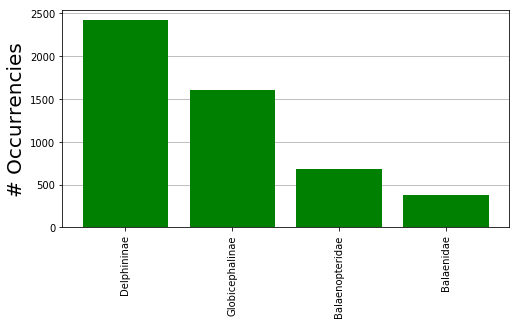

In [11]:
# Add species' families
df['subfamilies'] = df.GS.apply(lambda x: subfamilies[x])

# Remove families with very low number of samples
drop_list100 = ['Stenoninae', 'Orcininae', 'Eschrichtiidae', 'Phocoeinade']
#drop_list600 = ['Stenoninae', 'Orcininae', 'Eschrichtiidae', 'Phocoeinade', 'Physeteridae', 'Balaenopteridae', 'Balaenidae', 'Lissodelphininae']
drop_list600 = ['Stenoninae', 'Orcininae', 'Eschrichtiidae', 'Phocoeinade', 'Physeteridae', 'Lissodelphininae']

for item in drop_list600:
    df = df[df.subfamilies != item]

# Set categories for families and assign labels
subfamilies_type  = set(df['subfamilies'])
categories_subfamilies = range(len(subfamilies_type))
categories_subfamilies_dict = dict(zip(subfamilies_type, categories_subfamilies))
df['labels_subfamilies'] = df.subfamilies.apply(lambda x: categories_subfamilies_dict[x])
num_classes = len(subfamilies_type)

# Reverse dictionary for later classification
inv_categories_subfamilies_dict = {v: k for k, v in categories_subfamilies_dict.items()}

# Distribution of species's occurrencies in given dataset
occurrency = df.subfamilies.value_counts()
subfamilies_name = df.subfamilies.value_counts().keys().tolist()
num_classes = len(subfamilies_type)

# max entries for subspecies
maxsub = max(occurrency)

# Plot
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('# Occurrencies', fontsize=20)
ax1.set_axisbelow(True)
ax1.bar(subfamilies_name, occurrency, color='g')
plt.grid(b=True, axis='y')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Features / labels
x = np.array(df['features'].tolist())
y = np.array(df['labels_subfamilies'].tolist())

# Split in train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1045, random_state=12341)
X_train = x_train.reshape((x_train.shape[0], nscales, npca, 1)).astype('float32')
X_test  = x_test.reshape((x_test.shape[0], nscales, npca, 1)).astype('float32')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

# Report some info
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (4550, 1000)
4550 train samples
531 test samples


## 9.2 Train a convolution neural network

Accuracy decreases to 82%

Train on 4550 samples, validate on 531 samples
Epoch 1/15
4550/4550 [==============================] - 8s 2ms/step - loss: 1.0473 - acc: 0.5734 - val_loss: 0.7770 - val_acc: 0.6874
Epoch 2/15
4550/4550 [==============================] - 6s 1ms/step - loss: 0.6912 - acc: 0.7312 - val_loss: 0.5660 - val_acc: 0.7740
Epoch 3/15
4550/4550 [==============================] - 7s 1ms/step - loss: 0.5939 - acc: 0.7866 - val_loss: 0.5016 - val_acc: 0.8079
Epoch 4/15
4550/4550 [==============================] - 6s 1ms/step - loss: 0.5246 - acc: 0.8116 - val_loss: 0.4214 - val_acc: 0.8418
Epoch 5/15
4550/4550 [==============================] - 8s 2ms/step - loss: 0.5021 - acc: 0.8242 - val_loss: 0.4278 - val_acc: 0.8230
Epoch 6/15
4550/4550 [==============================] - 7s 2ms/step - loss: 0.4761 - acc: 0.8393 - val_loss: 0.4008 - val_acc: 0.8418
Epoch 7/15
4550/4550 [==============================] - 7s 2ms/step - loss: 0.4469 - acc: 0.8444 - val_loss: 0.4085 - val_acc: 0.8569
Epoch 8/15
4550

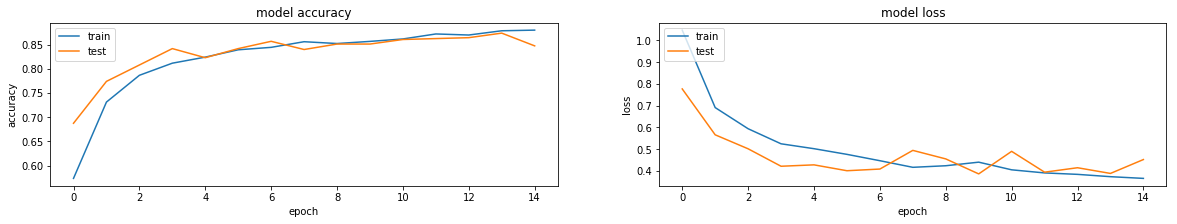

In [93]:
from keras.regularizers import l2
#kernel_regularizer=l2(0.0005)
# NN parameters
batch_size    = 200
epochs        = 15
activation    = 'relu'
optimizer     = 'rmsprop'
loss          = 'categorical_crossentropy'

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(0.0005), activation=activation, input_shape=(nscales, npca, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(0.0005), activation=activation))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation=activation, kernel_constraint=max_norm(2.)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=activation, kernel_constraint=max_norm(2.)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=1)

# Calculate score
scores = model.evaluate(X_test, y_test, verbose=1)
print('\nAccuracy:', scores[1])

# Save model
save_path = "Balenine_{:s}_{:s}_{:.3f}.convolution_subfamilies_keras".format(activation, optimizer, scores[1])
model.save(save_path)

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

Use of syntetic data for improving the accuracy.

First test: add gaussian noise

Generating 3 data for subfamily Globicephalinae, maxsub=2420


/home/panino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


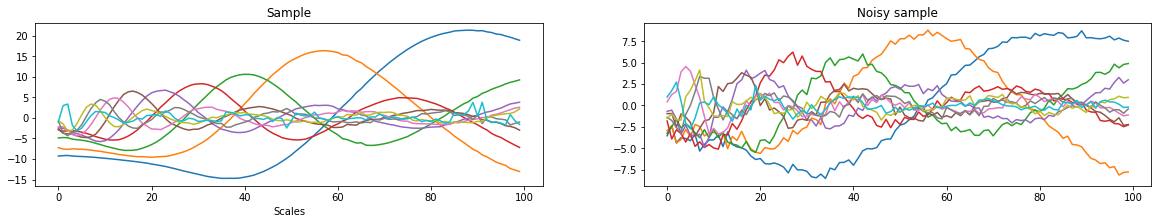

Generating 3 data for subfamily Balaenidae, maxsub=2420


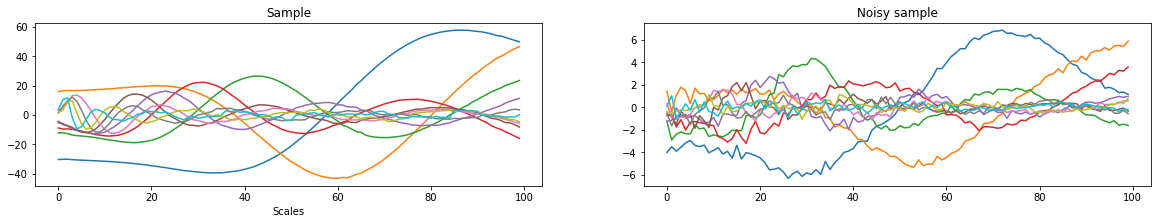

Generating 3 data for subfamily Balaenopteridae, maxsub=2420


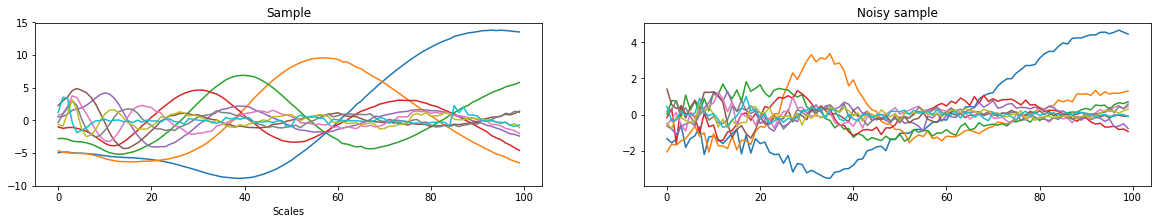

Current training set data size: 4559


In [16]:
def noise_maker (x, y, nscales, npca, noise_factor, num):
    
    # Number of sample in the test case
    nsamples = x.shape[0]
    
    # Pick-up num random indexes and random samples from dataset
    index = np.random.randint(nsamples, size=num)
    z  = x[index].reshape(num, nscales, npca, 1)
    y  = y[index]
    
    # Calculate std along scales
    sd = np.std(z, axis=1).flatten() / noise_factor

    # Generate gaussian noise 
    mean = np.zeros(sd.size)
    cov  = np.diagflat(sd)
    noise = np.random.multivariate_normal(mean, cov, nscales).T.reshape(num, nscales, npca, 1)
    noisy_data = z + noise

    return index, noisy_data, y
   
# noise maker parameters
noise_factor = 15

XN_train = X_train 
YN_train = y_train
for name in subfamilies_type:

    # Take subset of df for given subfamily
    df1 = df[df.subfamilies == name]
    x = np.array(df1['features'].tolist()).reshape((-1, nscales, npca, 1)).astype('float32')
    y = np.array(df1['labels_subfamilies'].tolist())
    y = keras.utils.to_categorical(y, num_classes)
    
    # Generate noisy data (complement to maxsub)
    numnoisy = min(3, maxsub - x.shape[0])    
    
    if(numnoisy):
        print('Generating {:d} data for subfamily {:s}, maxsub={:d}'.format(numnoisy, name, maxsub))
        index, x_noisy, y_noisy = noise_maker(x, y, nscales, npca, noise_factor, numnoisy)

        # Plots sample and noisy sample 
        idx = 2
        plt.figure(1, figsize=(20,3))
        ax1 = plt.subplot(121)
        ax1.plot(x_train[index[idx]].reshape(nscales, npca))
        ax1.set_title('Sample')
        ax1.set_xlabel('Scales')
        ax2 = plt.subplot(122)
        ax2.plot(x_noisy[idx, :, :, 0])
        ax2.set_title('Noisy sample')
        ax1.set_xlabel('Scales')

        plt.show()
        # Attach noisy data to the train data
        XN_train = np.vstack((XN_train, x_noisy))
        YN_train = np.vstack((YN_train, y_noisy))
        
print('Current training set data size: {:d}'.format(XN_train.shape[0]))


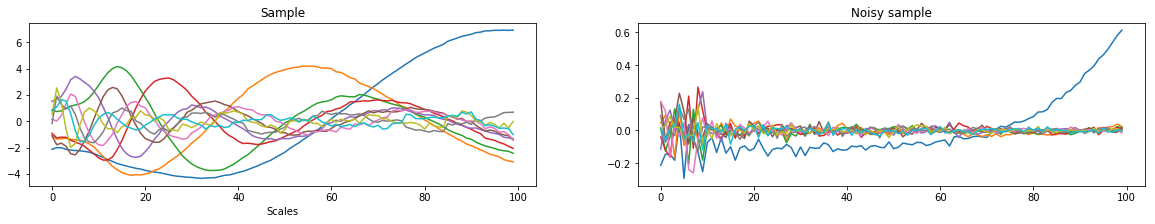

In [15]:
# Plots sample and noisy sample 
idx = 2
plt.figure(1, figsize=(20,3))
ax1 = plt.subplot(121)
ax1.plot(x_train[index[idx]].reshape(nscales, npca))
ax1.set_title('Sample')
ax1.set_xlabel('Scales')
ax2 = plt.subplot(122)
ax2.plot(x_noisy[idx, :, :, 0])
ax2.set_title('Noisy sample')
ax1.set_xlabel('Scales')

plt.show()

In [78]:
#kernel_regularizer=l2(0.0005)
# NN parameters
batch_size    = 400
epochs        = 25
activation    = 'relu'
optimizer     = 'rmsprop'
loss          = 'categorical_crossentropy'

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=(nscales, npca, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation=activation))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation=activation, kernel_constraint=max_norm(2.)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=activation, kernel_constraint=max_norm(2.)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#train the model
history = model.fit(XN_train, YN_train, validation_data=(X_test, y_test), epochs=epochs, verbose=1)

# Calculate score
scores = model.evaluate(X_test, y_test, verbose=1)
print('\nAccuracy:', scores[1])

# Save model
save_path = "Balenine_{:s}_{:s}_{:.3f}.convolution_subfamilies_keras".format(activation, optimizer, scores[1])
model.save(save_path)

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

Train on 2700 samples, validate on 1621 samples
Epoch 1/25
2700/2700 [==============================] - 6s 2ms/step - loss: 0.6768 - acc: 0.6311 - val_loss: 0.5194 - val_acc: 0.7841
Epoch 2/25
2700/2700 [==============================] - 4s 2ms/step - loss: 0.4938 - acc: 0.7826 - val_loss: 0.4265 - val_acc: 0.8316
Epoch 3/25
2700/2700 [==============================] - 4s 2ms/step - loss: 0.4088 - acc: 0.8400 - val_loss: 0.3763 - val_acc: 0.8310
Epoch 4/25
2700/2700 [==============================] - 4s 2ms/step - loss: 0.3547 - acc: 0.8589 - val_loss: 0.3787 - val_acc: 0.8489
Epoch 5/25
2700/2700 [==============================] - 4s 2ms/step - loss: 0.3107 - acc: 0.8785 - val_loss: 0.3239 - val_acc: 0.8612
Epoch 6/25
2700/2700 [==============================] - 4s 2ms/step - loss: 0.2725 - acc: 0.8952 - val_loss: 0.3623 - val_acc: 0.8513
Epoch 7/25
2700/2700 [==============================] - 4s 2ms/step - loss: 0.2792 - acc: 0.8959 - val_loss: 0.3595 - val_acc: 0.8723
Epoch 8/25
270

KeyboardInterrupt: 

test 2: repeat pattern on figure

.............................................................(100, 30, 1)


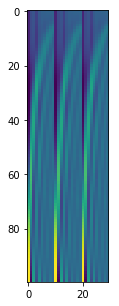

In [18]:
def generate_repeated_pattern (dataset, nscales, npca):
    new = None
    
    for i in range(dataset.shape[0]):
        a = np.zeros((1, nscales, 30, 1))
        for j in range(0, 30, npca):
            a[:,:,j:j+10] = dataset[i]
    
        if(new is not None):
            new = np.vstack((new, a))
        else:
            new = a
        if(i%100 is 0):
            print('.', end='')
        
    return new

# generate new pattern
XP_train = generate_repeated_pattern(X_train, nscales, npca)
XP_test  = generate_repeated_pattern(X_test, nscales, npca)
YP_train = y_train
YP_test  = y_test

print(XP_train[2].shape)

# test plot  
fig = plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.imshow(XP_train[2].squeeze())
plt.show()

In [36]:
from keras.layers import LeakyReLU
from keras.regularizers import l2
#kernel_regularizer=l2(0.0005)
#cnn_model.add(LeakyReLU(alpha=0.1))
# NN parameters
batch_size    = 400
epochs        = 50
activation    = 'relu'
optimizer     = 'rmsprop'
loss          = 'categorical_crossentropy'

#create model
model = Sequential()

#add model layers
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation=activation, input_shape=(nscales, 30, 1)))
#model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation=activation))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(256, activation=activation, kernel_constraint=max_norm(2.)))
#model.add(Dropout(0.5))
#model.add(Dense(256, activation=activation, kernel_constraint=max_norm(2.)))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#train the model
history = model.fit(XP_train, YP_train, validation_data=(XP_test, YP_test), epochs=epochs, verbose=1)

# Calculate score
scores = model.evaluate(XP_test, YP_test, verbose=1)
print('\nAccuracy:', scores[1])

# Save model
save_path = "Balenine_{:s}_{:s}_{:.3f}.convolution_subfamilies_keras".format(activation, optimizer, scores[1])
model.save(save_path)

# Plots 
plt.figure(1, figsize=(20,3))

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

Train on 3200 samples, validate on 2877 samples
Epoch 1/50
 544/3200 [====>.........................] - ETA: 27s - loss: 7.4461 - acc: 0.3695

KeyboardInterrupt: 

In [88]:
# Save model
save_path = "Odontoceta_{:s}_{:s}_{:.3f}.convolution_keras".format(activation, optimizer, scores[1])
model.save(save_path)

In [45]:
families = [ load_model("Odontoceta_relu_adam_0.937.convolution_keras"), \
             load_model("Mysticeta_relu_adam_0.925.convolution_keras") ]
parvordini = load_model("Balenine_relu_adam_0.968.convolution_keras")

# Fancyness Read data from file
image = [ [ plt.imread("delfino.jpg"), plt.imread("capodoglio.jpg") ], \
          [ plt.imread("balenottera.jpg"), plt.imread("balena.jpg") ] ]


In [60]:
# Read new wav data and assign category
pcs, cumvar, samplerate = process_audio4dataframe("P_macrocephalus_creak.wav")
#pcs1 = pcs.reshape((1,1000))
pcs2 = pcs.reshape((1,100, 10, 1))

In [61]:
prediction_parvordini = parvordini.predict(pcs2).flatten()
index_parvordini      = prediction_parvordini.argmax()
prediction_families   = families[index_parvordini].predict(pcs2).flatten()
index_families        = prediction_families.argmax()
prediction            = prediction_parvordini[index_parvordini] *prediction_families[index_families] * 100.

inv_dict = [inv_categories_odontoceta_dict, inv_categories_mysticeta_dict ]
cat_parvord = inv_categories_parvordini_dict[index_parvordini]
cat_family = inv_dict[index_parvordini][index_families]

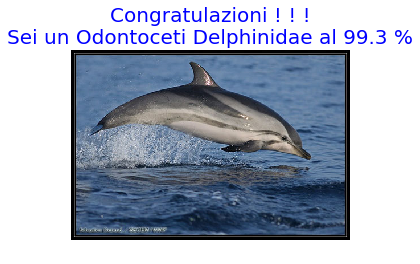

In [62]:
# Oracle response
plt.figure(1, figsize=(5,5))
plt.imshow(image[index_parvordini][index_families])
plt.title("Congratulazioni ! ! !\nSei un {:s} {:s} al {:.1f} %"     \
          .format(cat_parvord, cat_family, prediction), color='b', fontsize=20)
plt.axis('off')
plt.show()